In [1]:
# from ipfx.sweep import Sweep, SweepSet

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ipfx.dataset.create import create_ephys_data_set

#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod1/Ephys_Roi_Result_1084277304/Q21.26.006.14.01.03.nwb"         # PVALB high rheobase
#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod0/Ephys_Roi_Result_998543710/nwb2_Q20.26.001.11.03.03.nwb"    # PVALB no complete long trace set
#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod46/Ephys_Roi_Result_1173272167/QN22.26.016.14.02A.03.nwb"    # CCK-VIP-TAC3 - used
#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/QN22.26.016.14.02A.03.nwb"     # CCK-VIP-TAC3, same as above
nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/QN21.26.028.14.53.04.nwb"  # PVALB - used
#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod68/Ephys_Roi_Result_1287023589/QN23.26.016.14.06A.06.nwb"
#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/QN23.26.016.14.06A.06.nwb"   # CHAT
#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod8/Ephys_Roi_Result_1116575361/Q21.26.023.13.04.03.nwb"
#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/Q21.26.023.13.04.03.nwb"    # SST-Chodl
#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/Q21.26.013.12.02.01.nwb"    # SST-Chodl
#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod70/Ephys_Roi_Result_1182683972/QN22.26.020.14.03.01.nwb"
#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/QN22.26.020.14.03.01.nwb"    # CCK-FBXL7
#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod11/Ephys_Roi_Result_1160525223/QM22.26.003.14.51.03.nwb" 
#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/QM22.26.003.14.51.03.nwb"   # LHX6-TAC3-PLPP4  Used although doesn't go very negative
#nwb_path =  "/allen/programs/celltypes/production/humancelltypes/prod11/Ephys_Roi_Result_1167375001/QN22.26.010.14.51.02.nwb"
#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/QN22.26.010.14.51.02.nwb"    # LHX6-TAC3-PLPP4
#nwb_path = "/allen/programs/celltypes/production/humancelltypes/prod46/Ephys_Roi_Result_1170462060/QN22.26.014.14.3A.01.nwb"
#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/QN22.26.014.14.3A.01.nwb" # LHX6-TAC3-PLPP4  no good

#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/Q21.26.020.14.05.03.nwb"   # For testing a cell with chirp pass
#nwb_path = "/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/nwb/QN22.26.016.14.03A.04.nwb"    # For testing a cell with chirp pass

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

dataset = create_ephys_data_set(nwb_file=nwb_path)
long_squares = dataset.filtered_sweep_table(stimuli=dataset.ontology.long_square_names) # more on this next!
sweep_set = dataset.sweep_set(long_squares.sweep_number)


KeyboardInterrupt: 

-110
30


/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/305727253.py:37: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[0])
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/305727253.py:38: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[1])


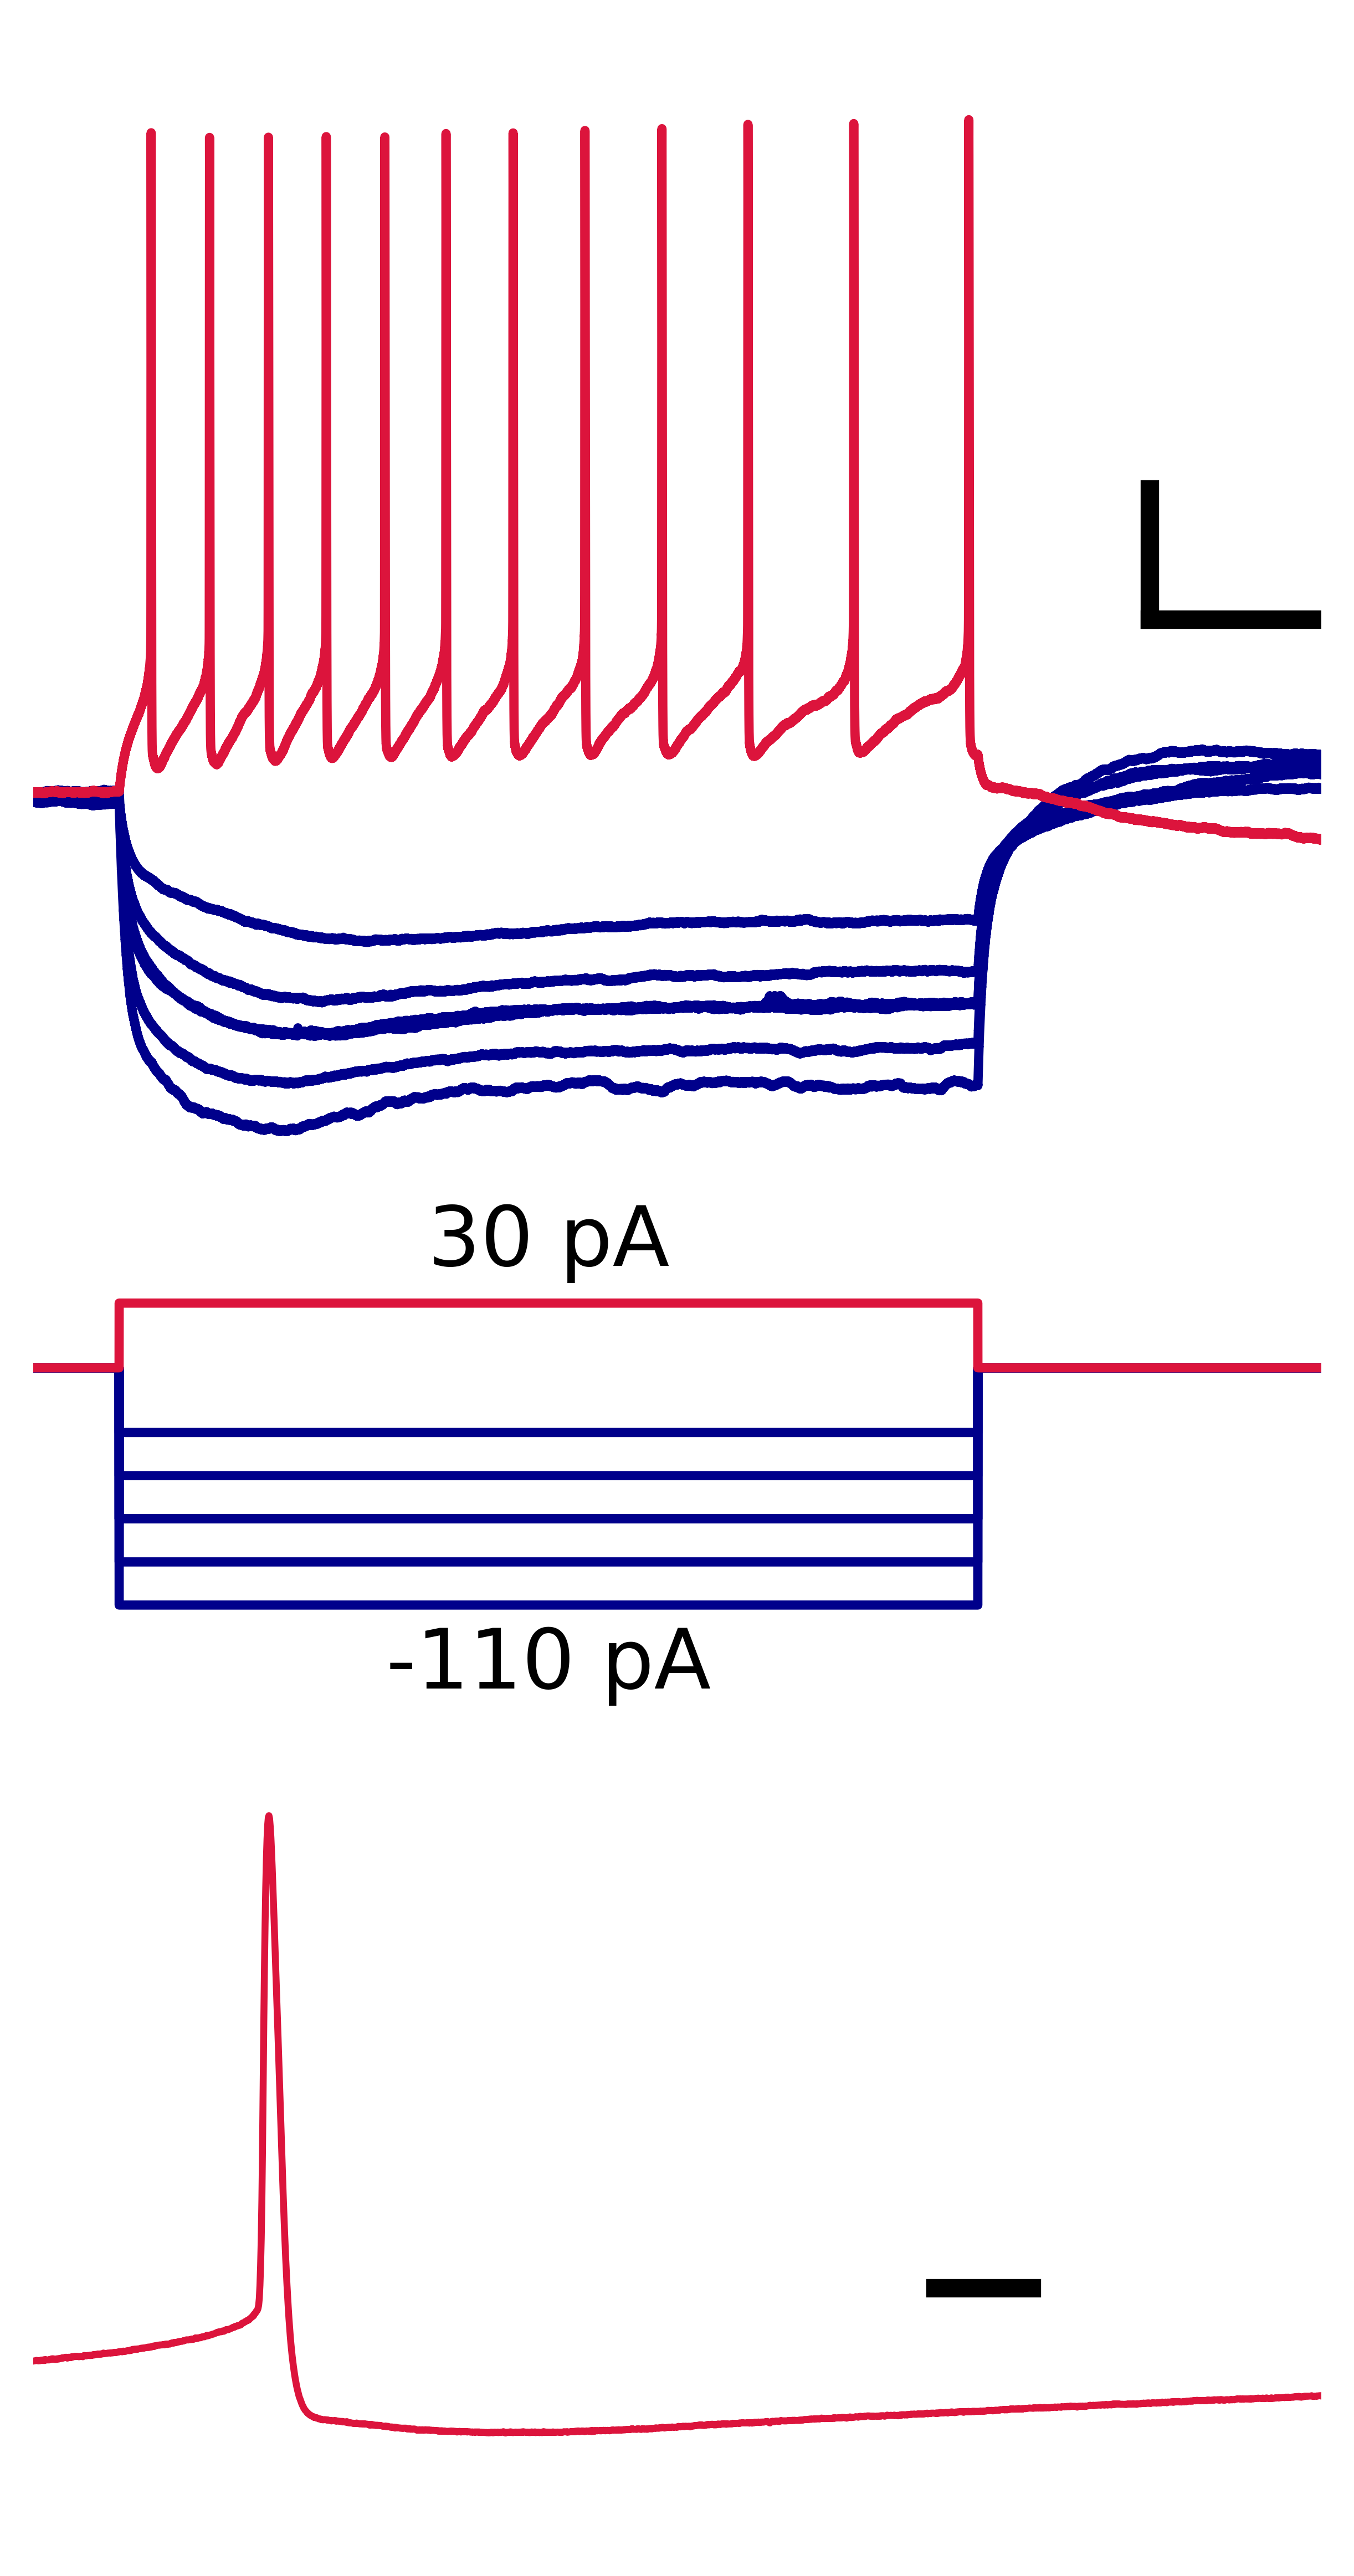

In [271]:
#import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#sweep = dataset.sweep(sweep_number)
sweep_list = [10, 11, 19, 20, 22, 24, 32]   # CCK-VIP-TAC3
sweep_rheo = 32

fig,axs = plt.subplots(3,1, figsize = (5,10), sharex = True, gridspec_kw={'height_ratios': [1, 0.3, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        color = 'crimson'
    else:
        color = 'darkblue'
    axs[0].plot(t,v,color,linewidth=2)
    axs[0].axis('off')
    axs[1].plot(t,i,color,linewidth=2)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))
print(round(np.min(all_i)))
print(round(np.max(all_i)))

plt.xlim([0.5, 2.0])
axs[0].set_ylim([-120, 50])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
x_min_ap = 0.63
x_max_ap = x_min_ap +0.04
axs[2].set_xlim([x_min_ap, x_max_ap])
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.7*(x_max_ap-x_min_ap)+x_min_ap, 0.7*(x_max_ap-x_min_ap)+x_min_ap + 0.003], [-40, -40], 'k', linewidth = 4)    # 3 ms

#axs[2].set_xlim([0.63, 0.655])
#axs[2].plot([0.65, 0.653], [-40, -40], 'k', linewidth = 4)    # 3 ms

axs[1].text(1.1, max_i + 28, str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.1, min_i - 28, str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

#plt.savefig('/home/xiaoping.liu/raw_trace/CCK-VIP-TAC3_QN22260161402A03.png')
plt.savefig('/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/python/QN22260161402A03_CCK-VIP-TAC3.png')
plt.show()

-70
10


/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/378622430.py:40: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[0])
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/378622430.py:41: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[1])


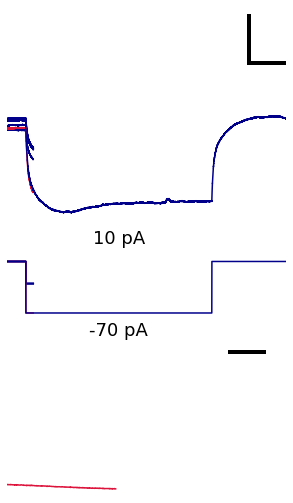

In [117]:
# NOT USED PVALB CELL

#import numpy as np
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#sweep = dataset.sweep(sweep_number)
#sweep_list = [5, 6, 7, 8, 9, 16, 17, 18, 19, 20]   # PVALB    #16 maybe
sweep_list = [5, 6, 7, 8, 9, 17, 20]  
sweep_rheo = 17

fig,axs = plt.subplots(3,1, figsize = (5,9), sharex = True, gridspec_kw={'height_ratios': [1, 0.25, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        tr_color = 'crimson'
    else:
        tr_color = 'darkblue'
    axs[0].plot(t,v,tr_color)
    axs[0].axis('off')

    axs[1].plot(t,i,tr_color)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))
print(round(np.min(all_i)))
print(round(np.max(all_i)))

plt.xlim([0.5, 2.0])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
axs[2].set_xlim([0.63, 0.655])     # 25 ms
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.65, 0.653], [-40, -40], 'k', linewidth = 4)    # 3 ms

axs[1].text(1.1, max_i + 21, str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.1, min_i - 23, str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

#plt.savefig('/home/xiaoping.liu/raw_trace/CCK-VIP-TAC3_QN22260161402A03.png')
plt.show()

-110
72


/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/3772077855.py:32: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[0])
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/3772077855.py:33: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[1])


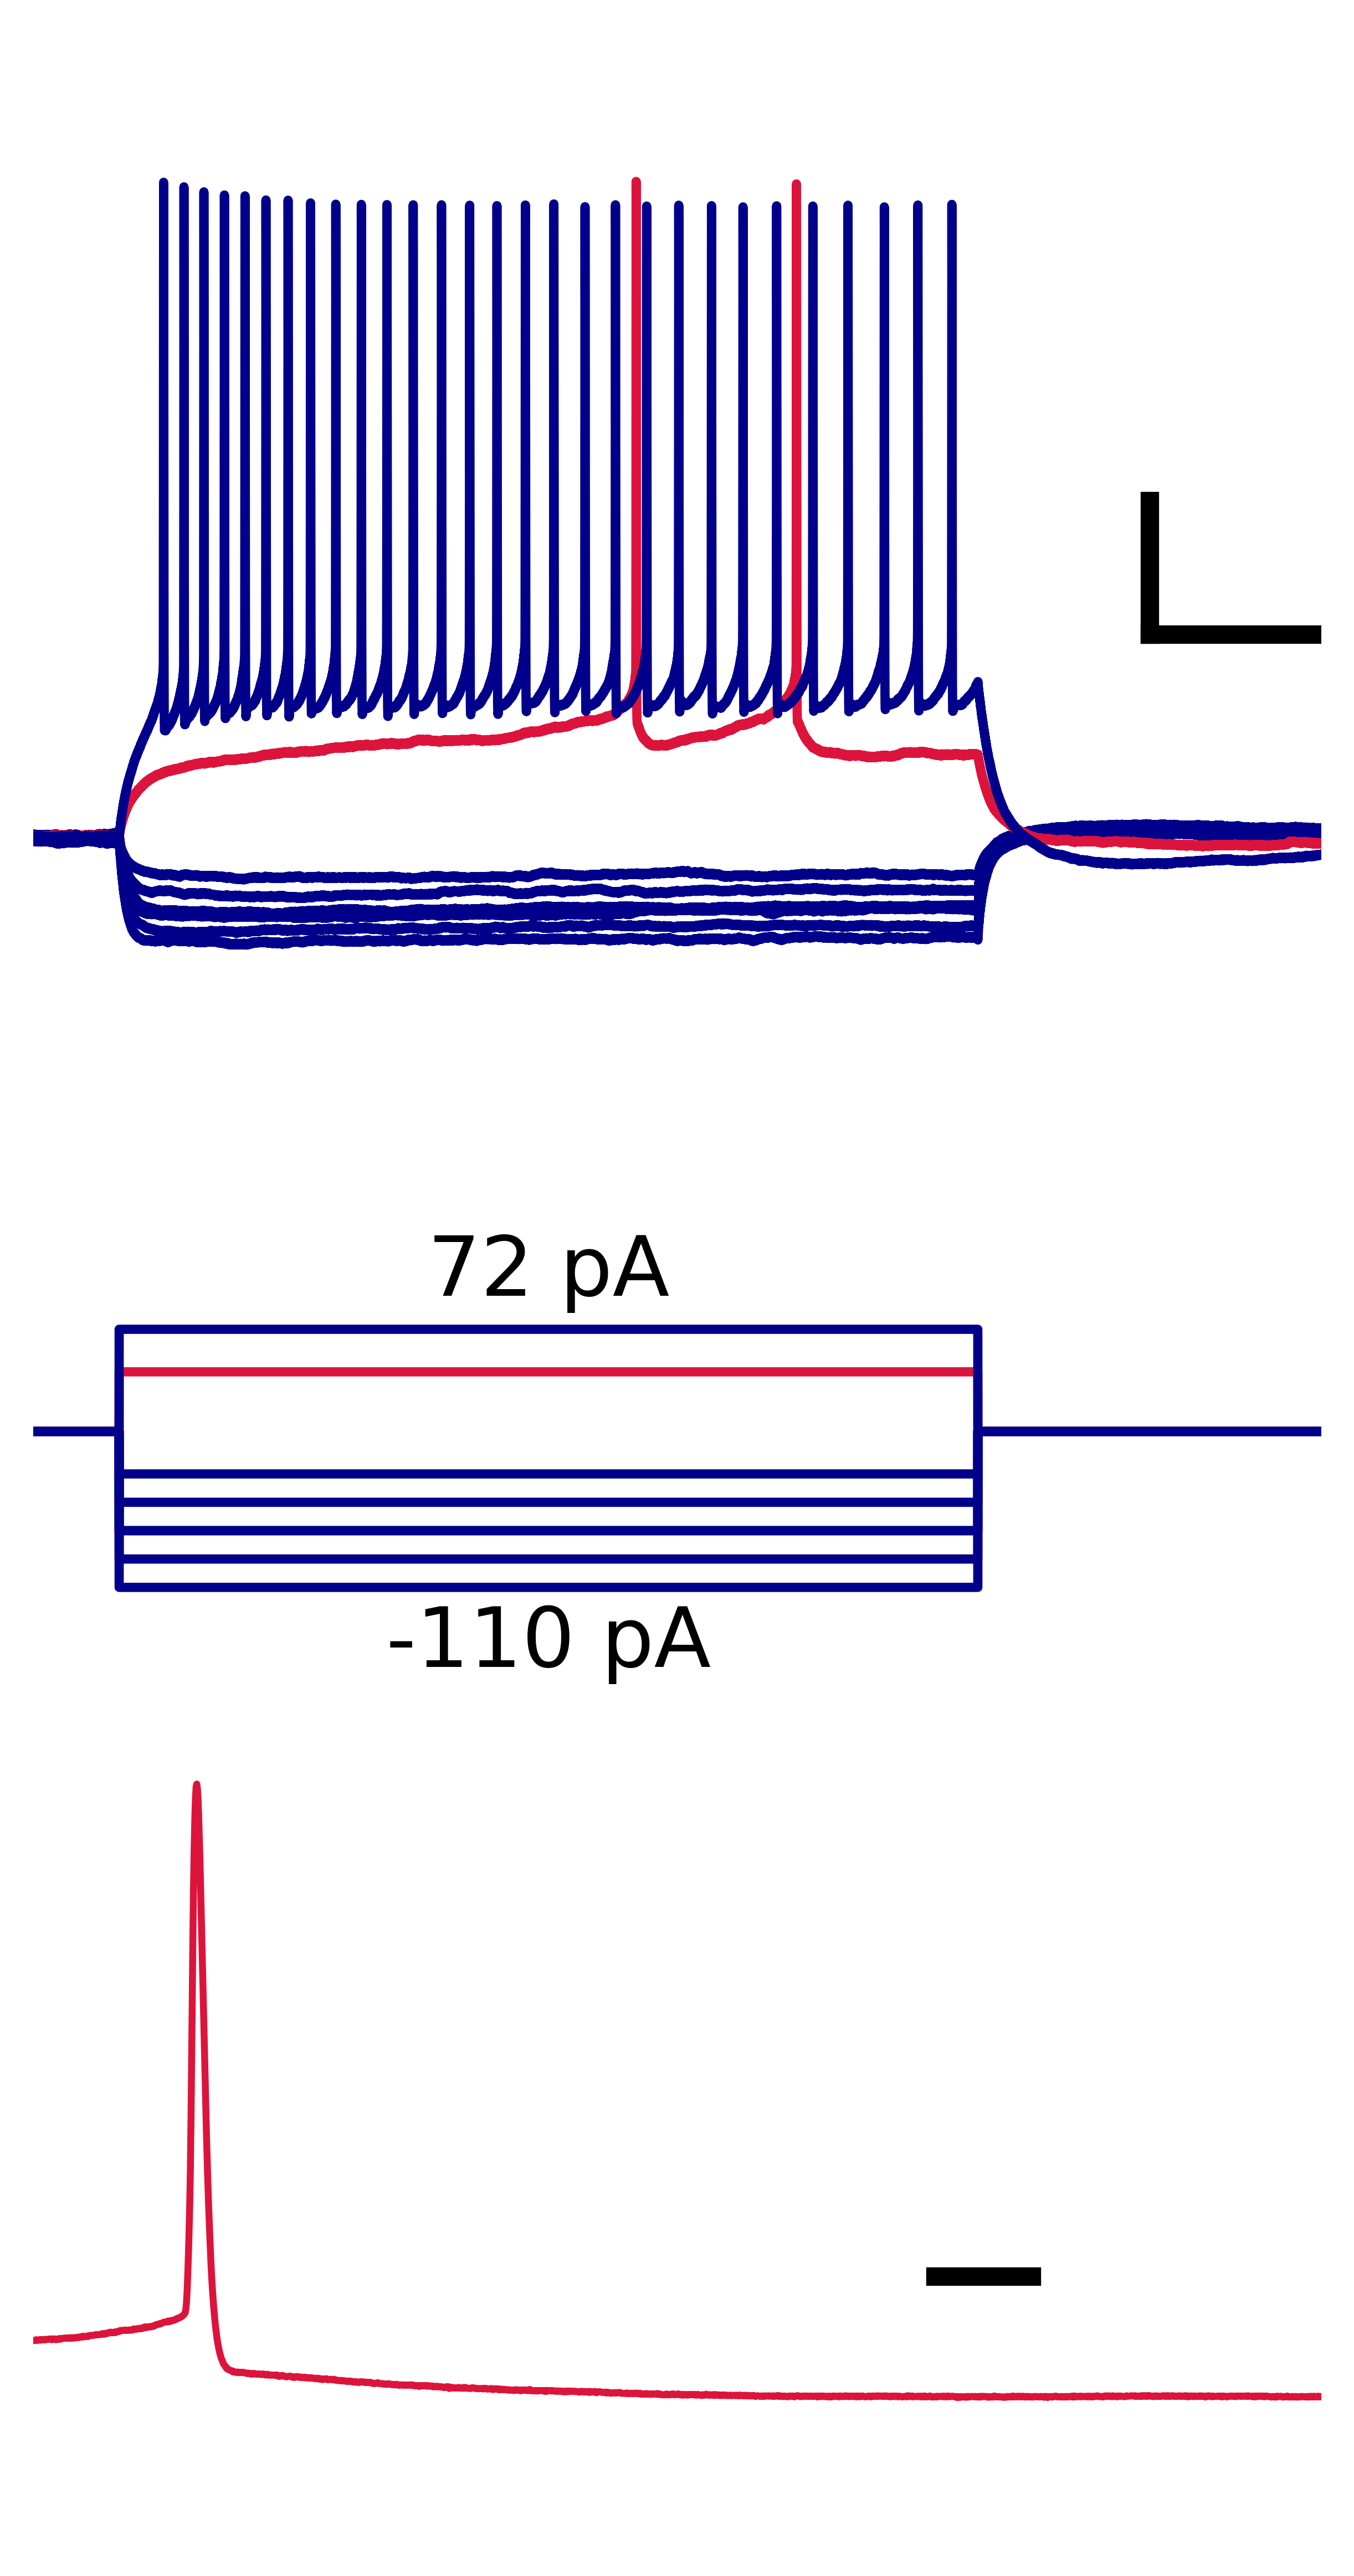

In [274]:

#sweep = dataset.sweep(sweep_number)
sweep_list = [4,5,6,8,9,10,20,18]   # PVALB  QN21.26.028.14.53.04.nwb   
sweep_rheo = 18

fig,axs = plt.subplots(3,1, figsize = (5,10), sharex = True, gridspec_kw={'height_ratios': [1, 0.25, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        color = 'crimson'
    else:
        color = 'darkblue'
    axs[0].plot(t,v,color,linewidth=2)
    axs[0].axis('off')
    axs[1].plot(t,i,color,linewidth=2)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))
print(round(np.min(all_i)))
print(round(np.max(all_i)))

plt.xlim([0.5, 2.0])
axs[0].set_ylim([-120, 50])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
x_min_ap = 1.197
x_max_ap = x_min_ap+0.04
axs[2].set_xlim([x_min_ap, x_max_ap])
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.7*(x_max_ap-x_min_ap)+x_min_ap, 0.7*(x_max_ap-x_min_ap)+x_min_ap + 0.003], [-40, -40], 'k', linewidth = 4)    # 3 ms

axs[1].text(1.1, max_i + 40, str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.1, min_i - 40, str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

plt.savefig('/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/python/QN2126028145304_PVALB.png')
plt.show()

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/2434050590.py:32: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[0])
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/2434050590.py:33: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[1])


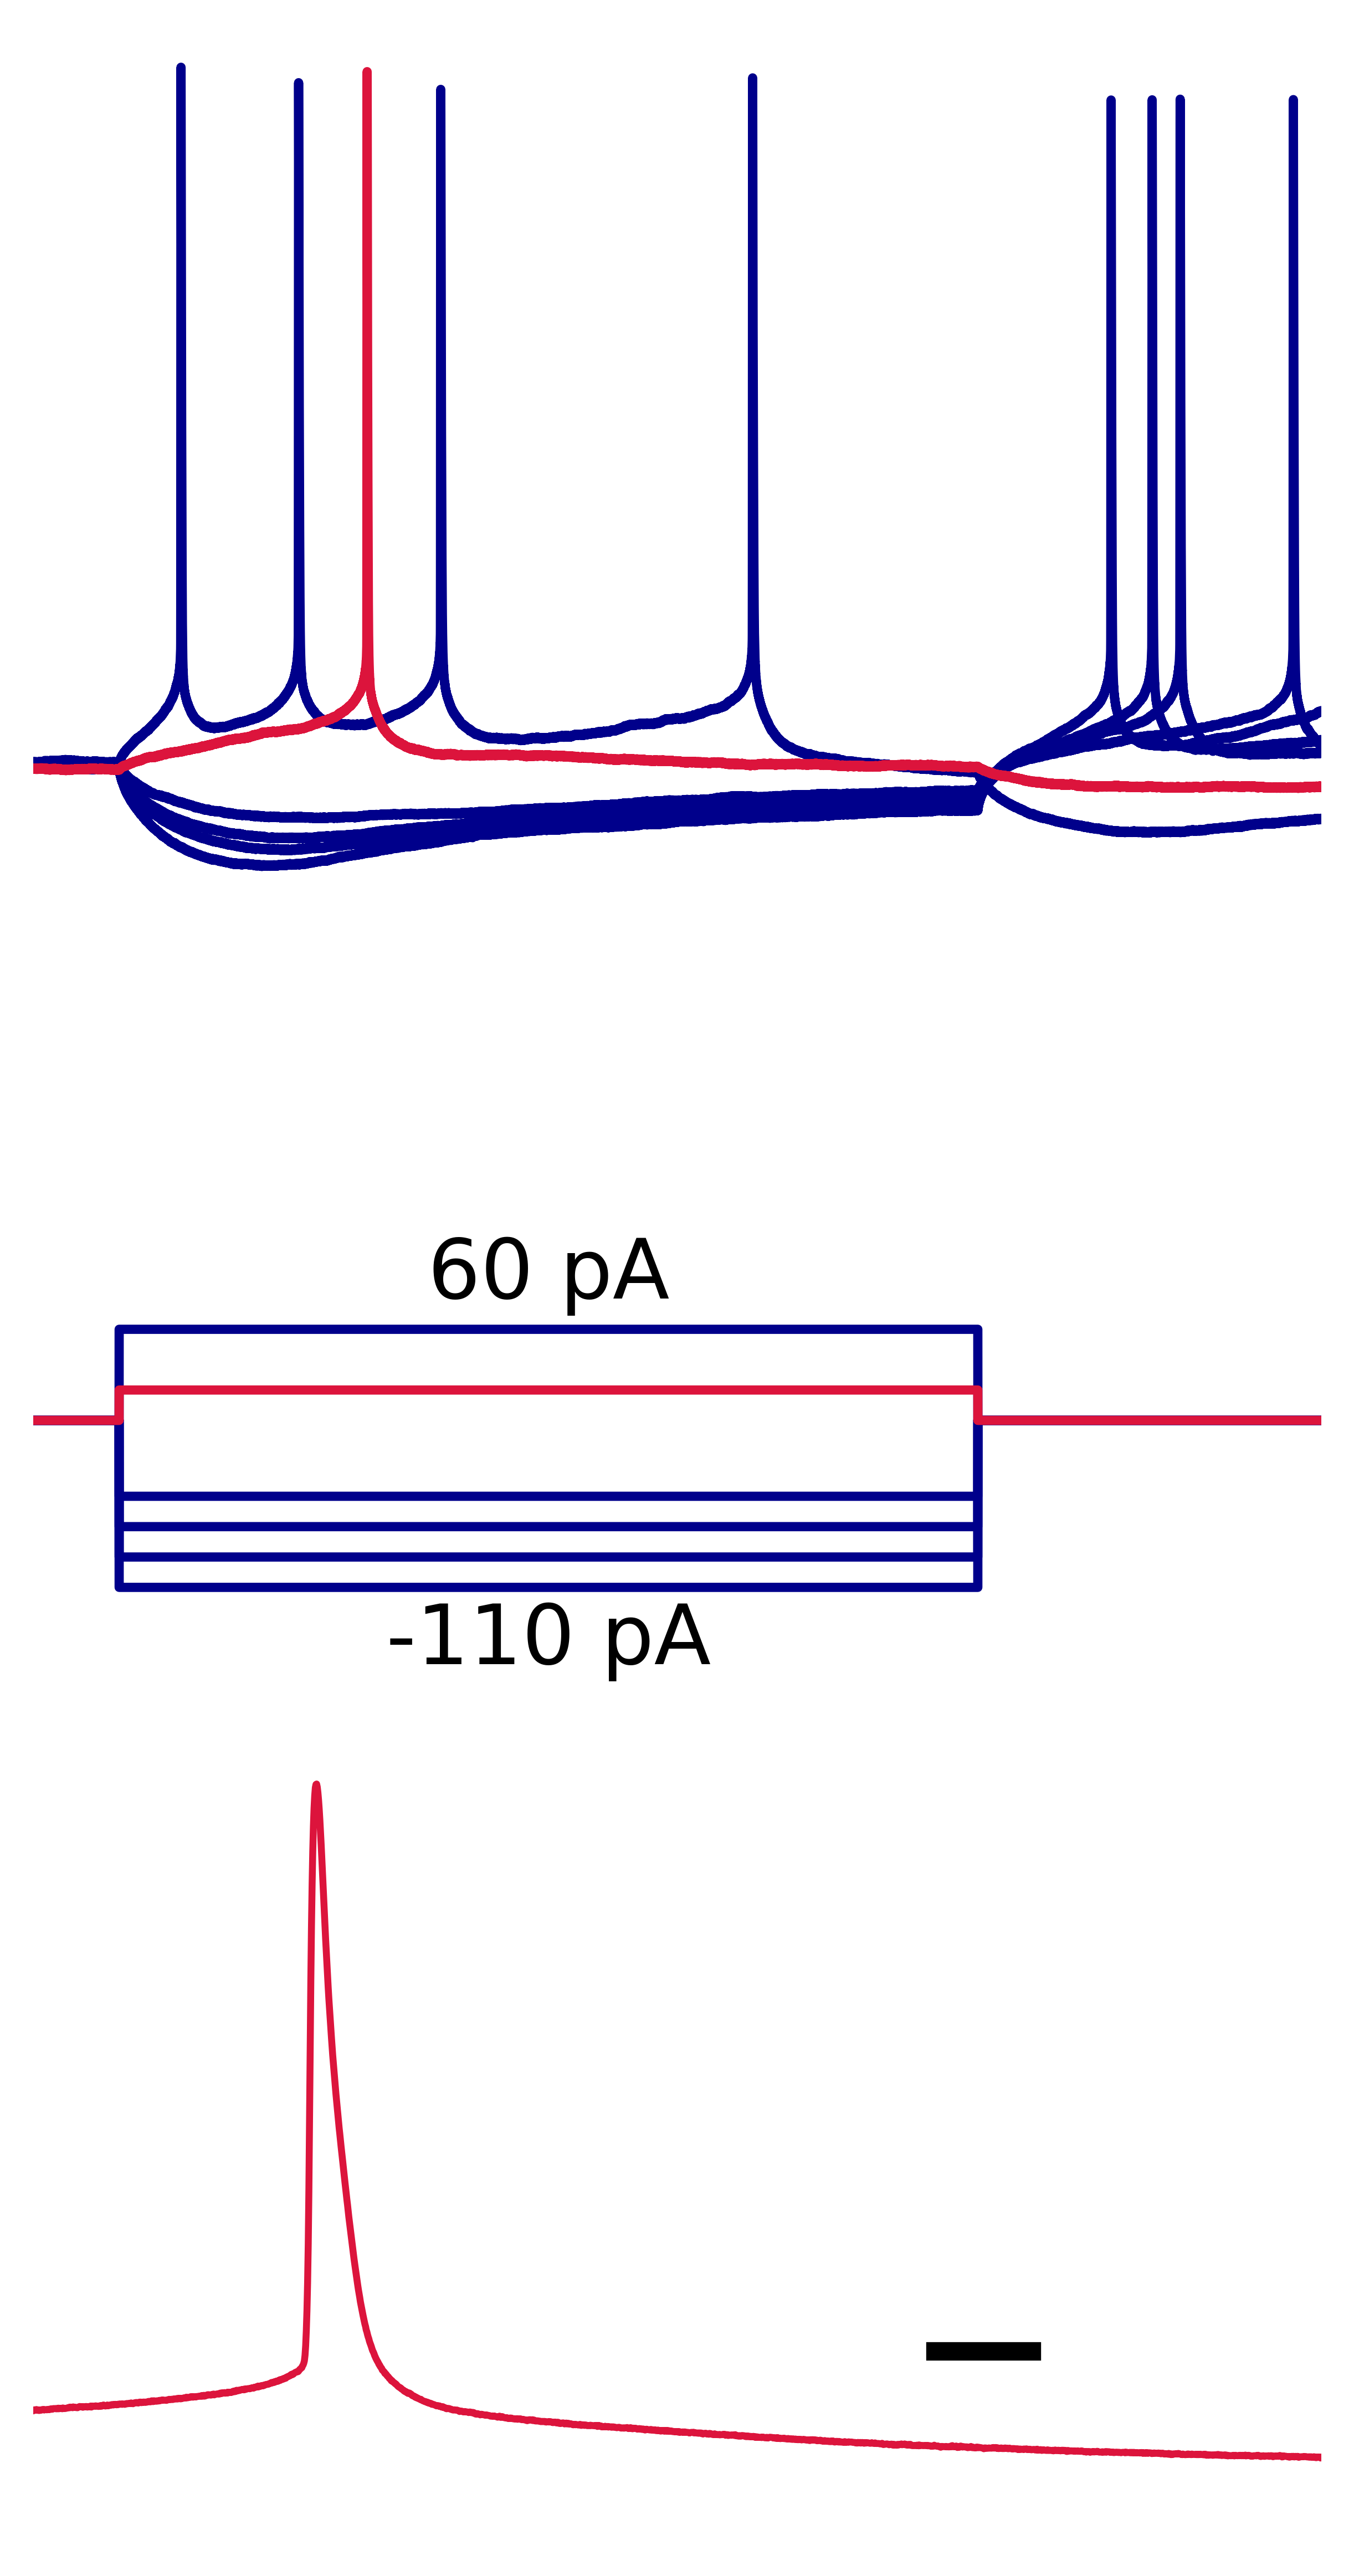

In [282]:
#sweep_list = [11,12,13,14,]   # CHAT    14 or 17, 22, 23
sweep_list = [43, 45, 47, 48, 88, 93]
sweep_rheo = 93
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

fig,axs = plt.subplots(3,1, figsize = (5,10), sharex = True, gridspec_kw={'height_ratios': [1, 0.25, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        color = 'crimson'
    else:
        color = 'darkblue'
    axs[0].plot(t,v,color,linewidth=2)
    axs[0].axis('off')
    axs[1].plot(t,i,color,linewidth=2)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))

plt.xlim([0.5, 2.0])
axs[0].set_ylim([-120, 50])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
x_min_ap = 0.88
x_max_ap = x_min_ap+0.04
axs[2].set_xlim([x_min_ap, x_max_ap])
#axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
#axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.7*(x_max_ap-x_min_ap)+x_min_ap, 0.7*(x_max_ap-x_min_ap)+x_min_ap + 0.003], [-40, -40], 'k', linewidth = 4)    # 3 ms

yl = axs[2].get_ylim()
axs[1].text(1.1, max_i + 0.3*(yl[1]-yl[0]), str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.1, min_i - 0.35*(yl[1]-yl[0]), str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

plt.savefig('/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/python/QN23260161406A06_CHAT.png')
plt.show()

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_95577/2708058476.py:35: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[0])
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_95577/2708058476.py:36: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[1])


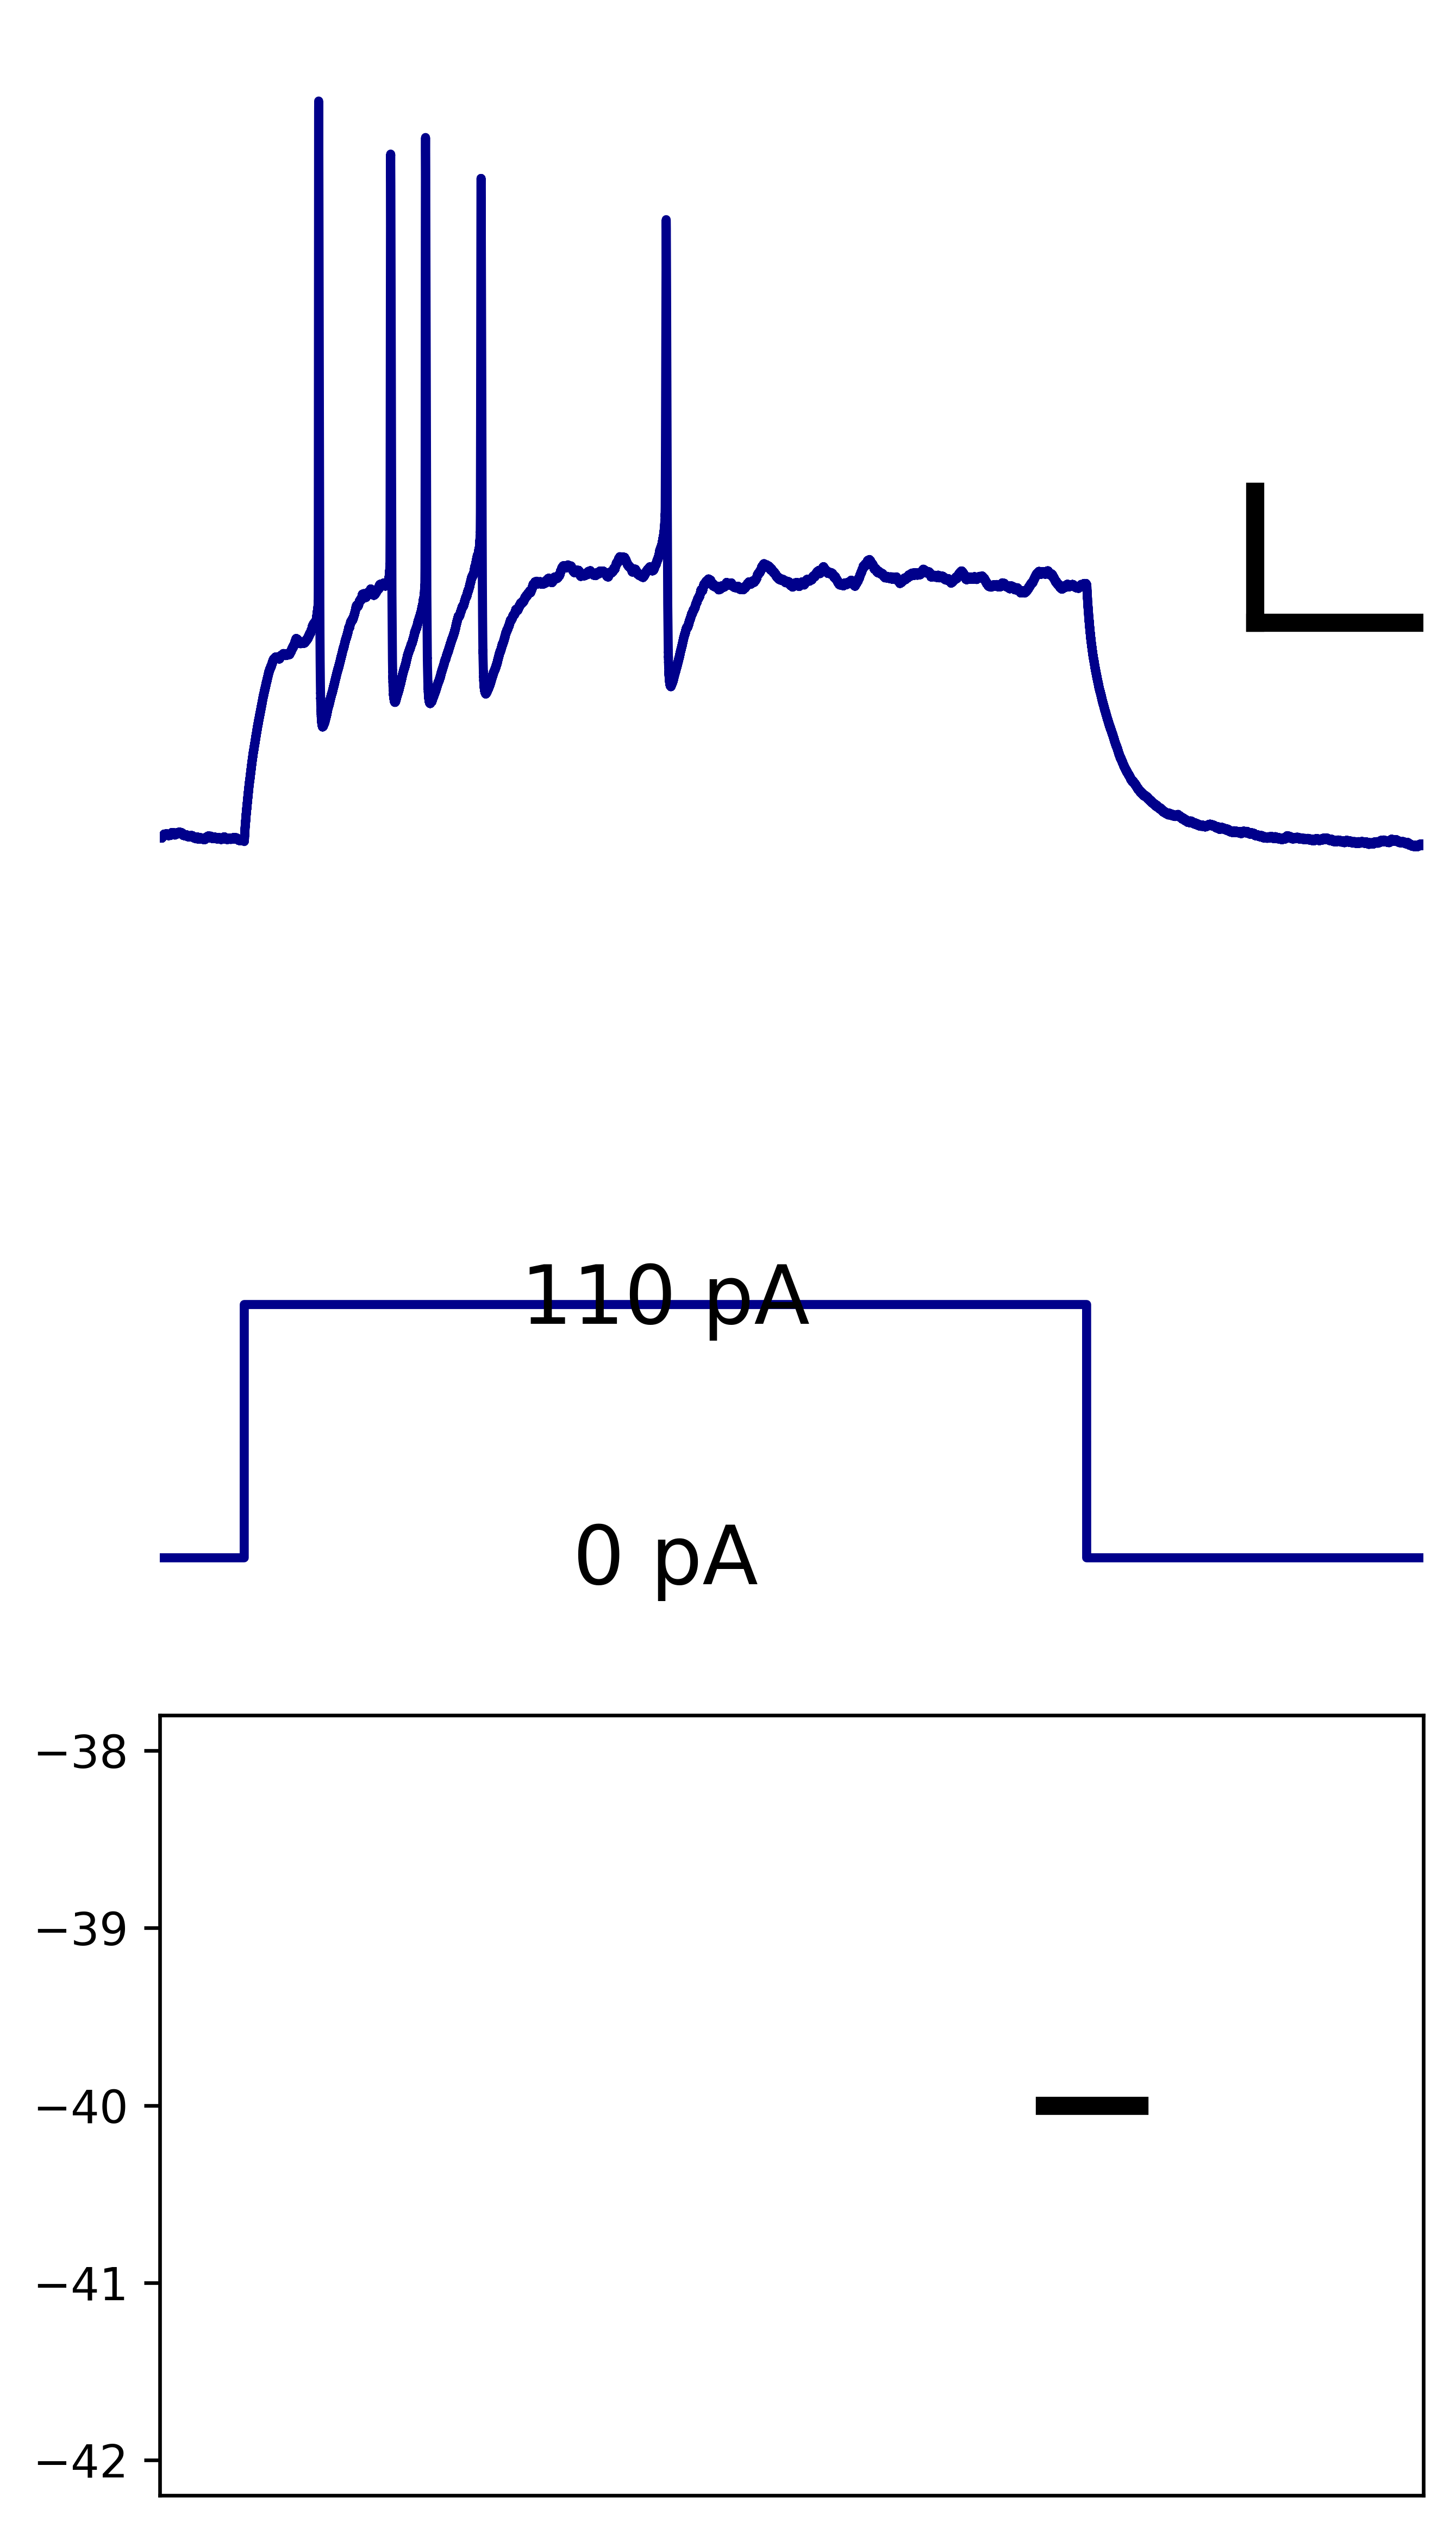

In [5]:
# SST-Chodl

#sweep_list = [6, 8, 14, 16, 18, 48]
sweep_list = [29, 35, 36, 41, 48, 66, 64]
sweep_rheo = 64
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

fig,axs = plt.subplots(3,1, figsize = (5,10), sharex = True, gridspec_kw={'height_ratios': [1, 0.25, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        color = 'crimson'
    else:
        color = 'darkblue'
    axs[0].plot(t,v,color,linewidth=2)
    axs[0].axis('off')
    axs[1].plot(t,i,color,linewidth=2)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))

plt.xlim([0.5, 2.0])
axs[0].set_ylim([-120, 50])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
x_min_ap = 1.03
x_max_ap = x_min_ap+0.04
axs[2].set_xlim([x_min_ap, x_max_ap])
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.7*(x_max_ap-x_min_ap)+x_min_ap, 0.7*(x_max_ap-x_min_ap)+x_min_ap + 0.003], [-40, -40], 'k', linewidth = 4)    # 3 ms

yl = axs[2].get_ylim()
axs[1].text(1.1, max_i + 0.35*(yl[1]-yl[0]), str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.1, min_i - 0.4*(yl[1]-yl[0]), str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

plt.savefig('/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/python/Q2126023130403_SST-Chodl.png')
plt.show()

ValueError: No TimeSeries found for sweep number 48.

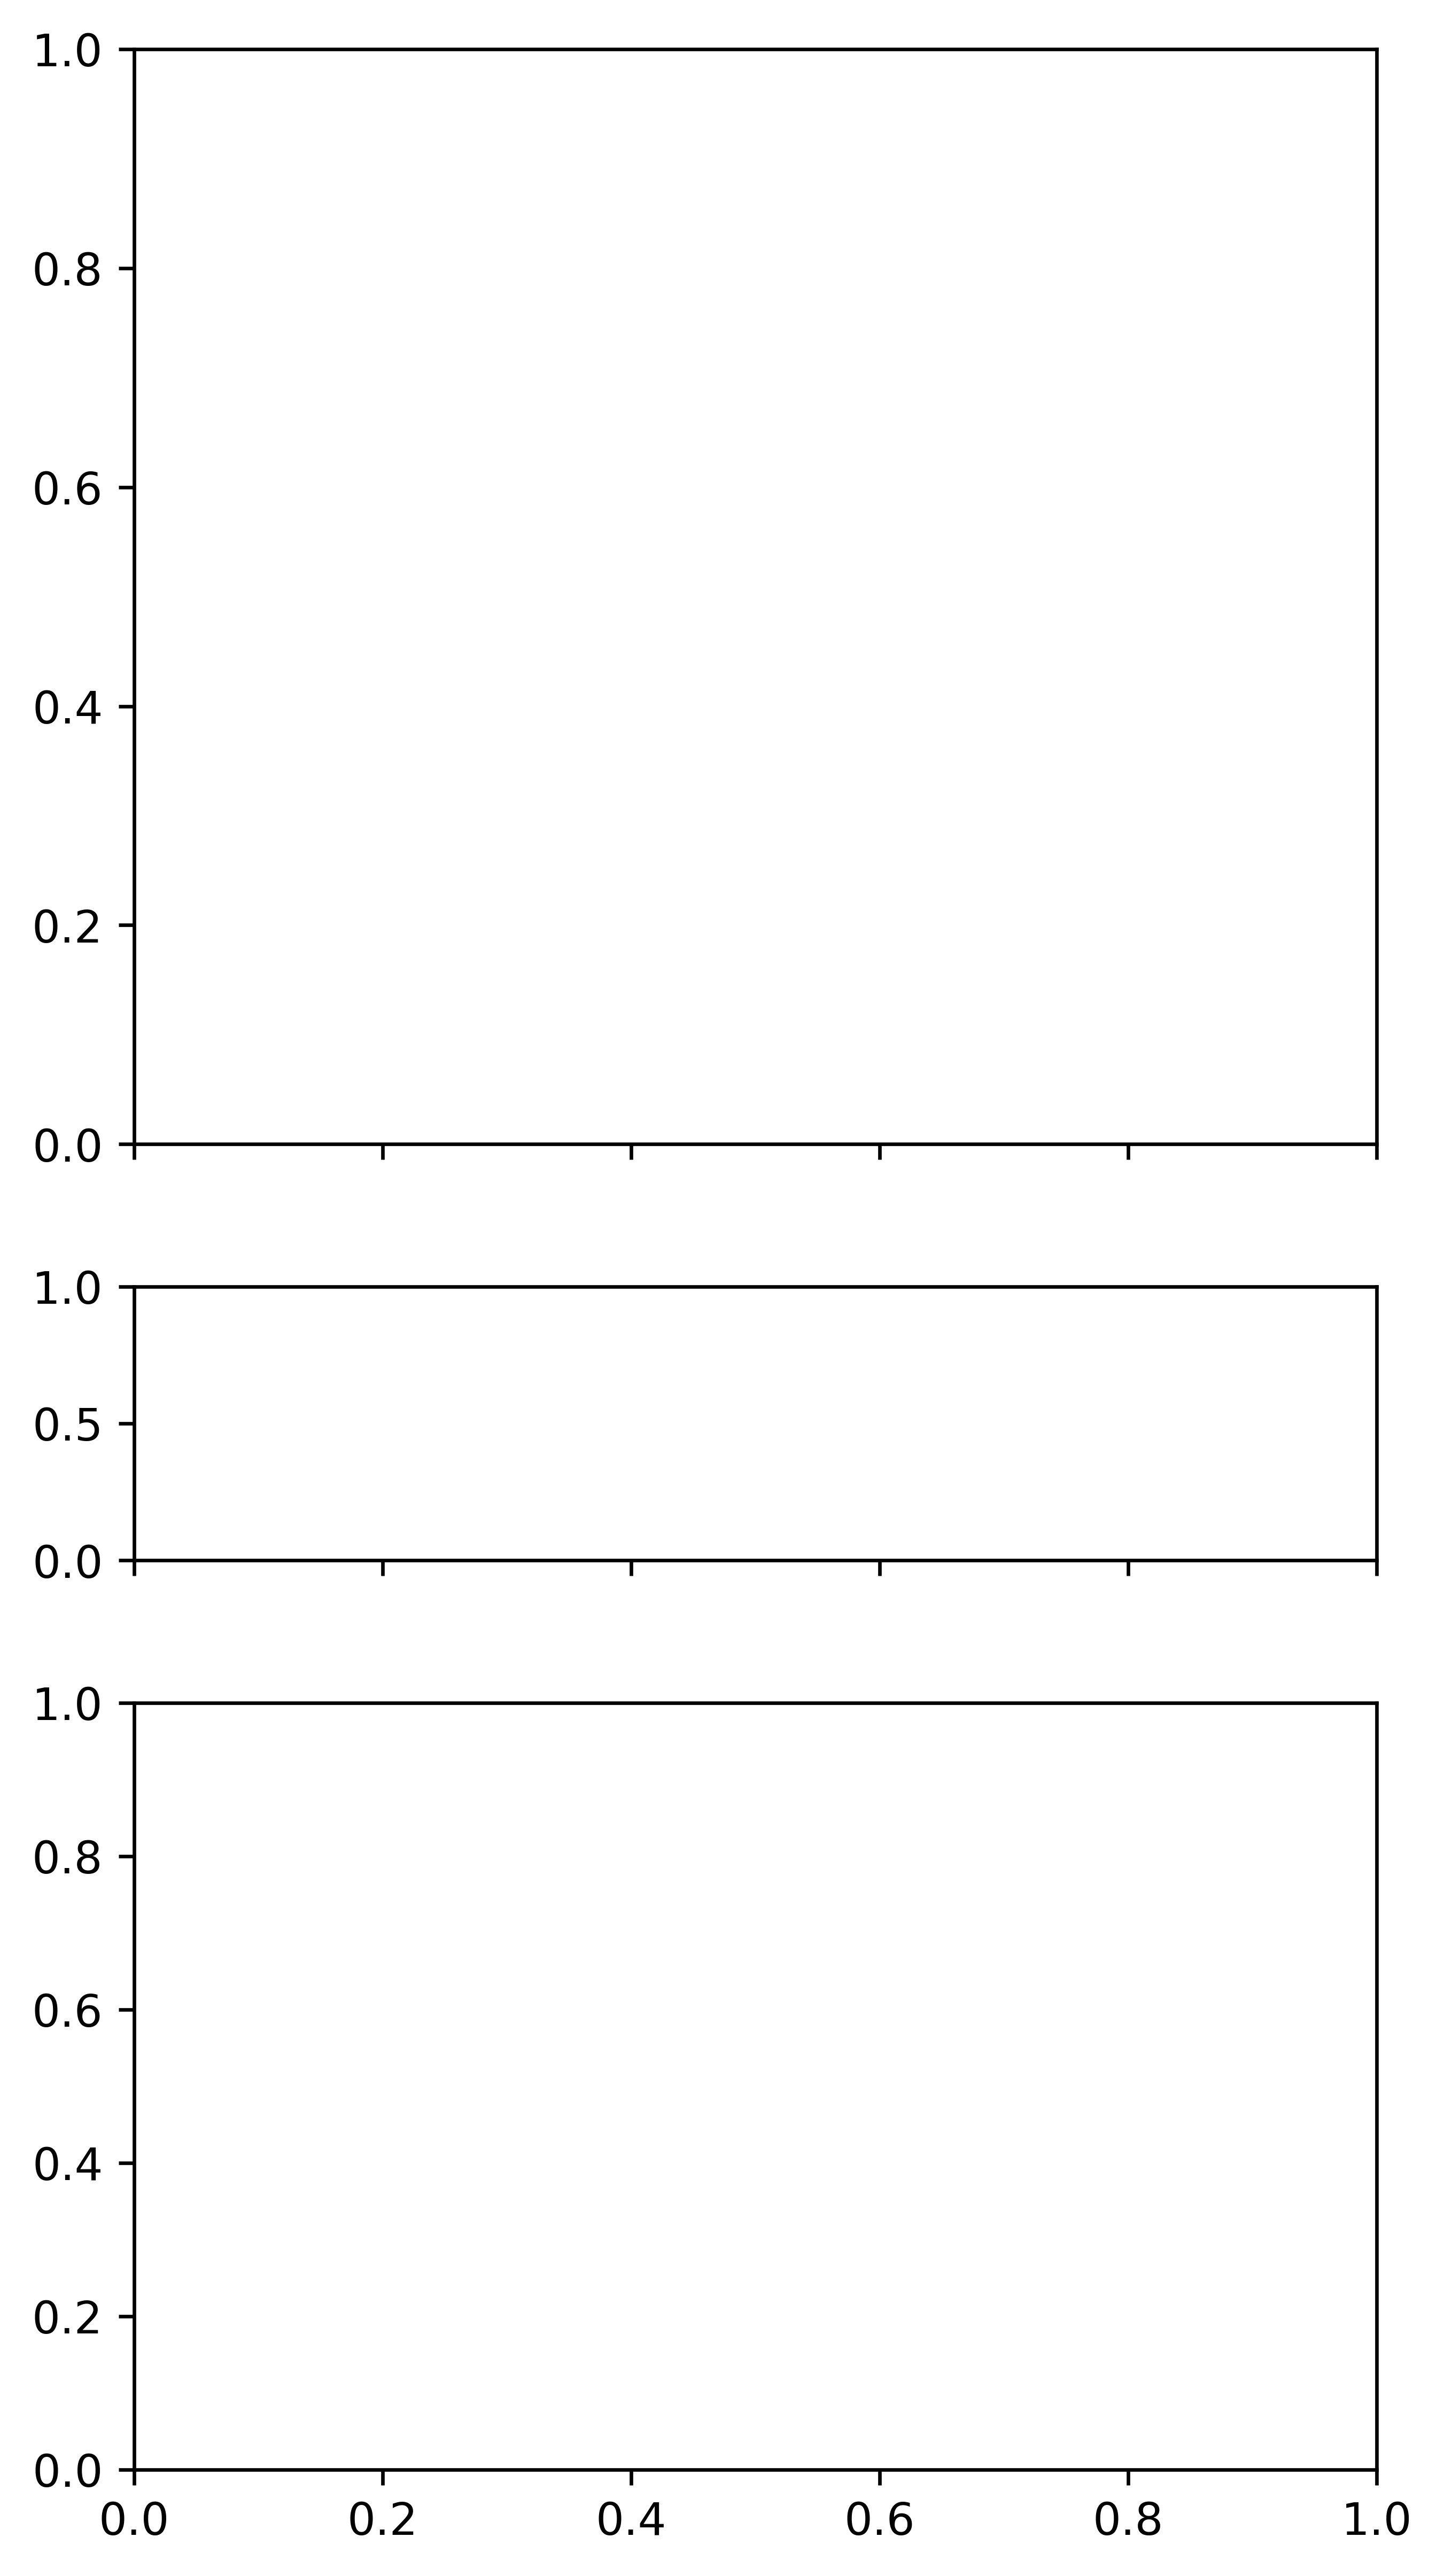

In [190]:
# Test viewer

sweep_list = [48]

sweep_rheo = 64
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

fig,axs = plt.subplots(3,1, figsize = (5,10), sharex = True, gridspec_kw={'height_ratios': [1, 0.25, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        color = 'crimson'
    else:
        color = 'darkblue'
    axs[0].plot(t,v,color,linewidth=2)
    axs[0].axis('off')
    axs[1].plot(t,i,color,linewidth=2)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))

#plt.xlim([0.5, 2.0])
#axs[0].set_ylim([-120, 50])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
x_min_ap = 1.03
x_max_ap = x_min_ap+0.04
#axs[2].set_xlim([x_min_ap, x_max_ap])
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.7*(x_max_ap-x_min_ap)+x_min_ap, 0.7*(x_max_ap-x_min_ap)+x_min_ap + 0.003], [-40, -40], 'k', linewidth = 4)    # 3 ms

yl = axs[2].get_ylim()
axs[1].text(1.1, max_i + 0.35*(yl[1]-yl[0]), str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.1, min_i - 0.4*(yl[1]-yl[0]), str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

#plt.savefig('/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/python/Q2126013120201_SST-Chodl.png')
plt.show()

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/3890111150.py:33: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[0])
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/3890111150.py:34: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[1])


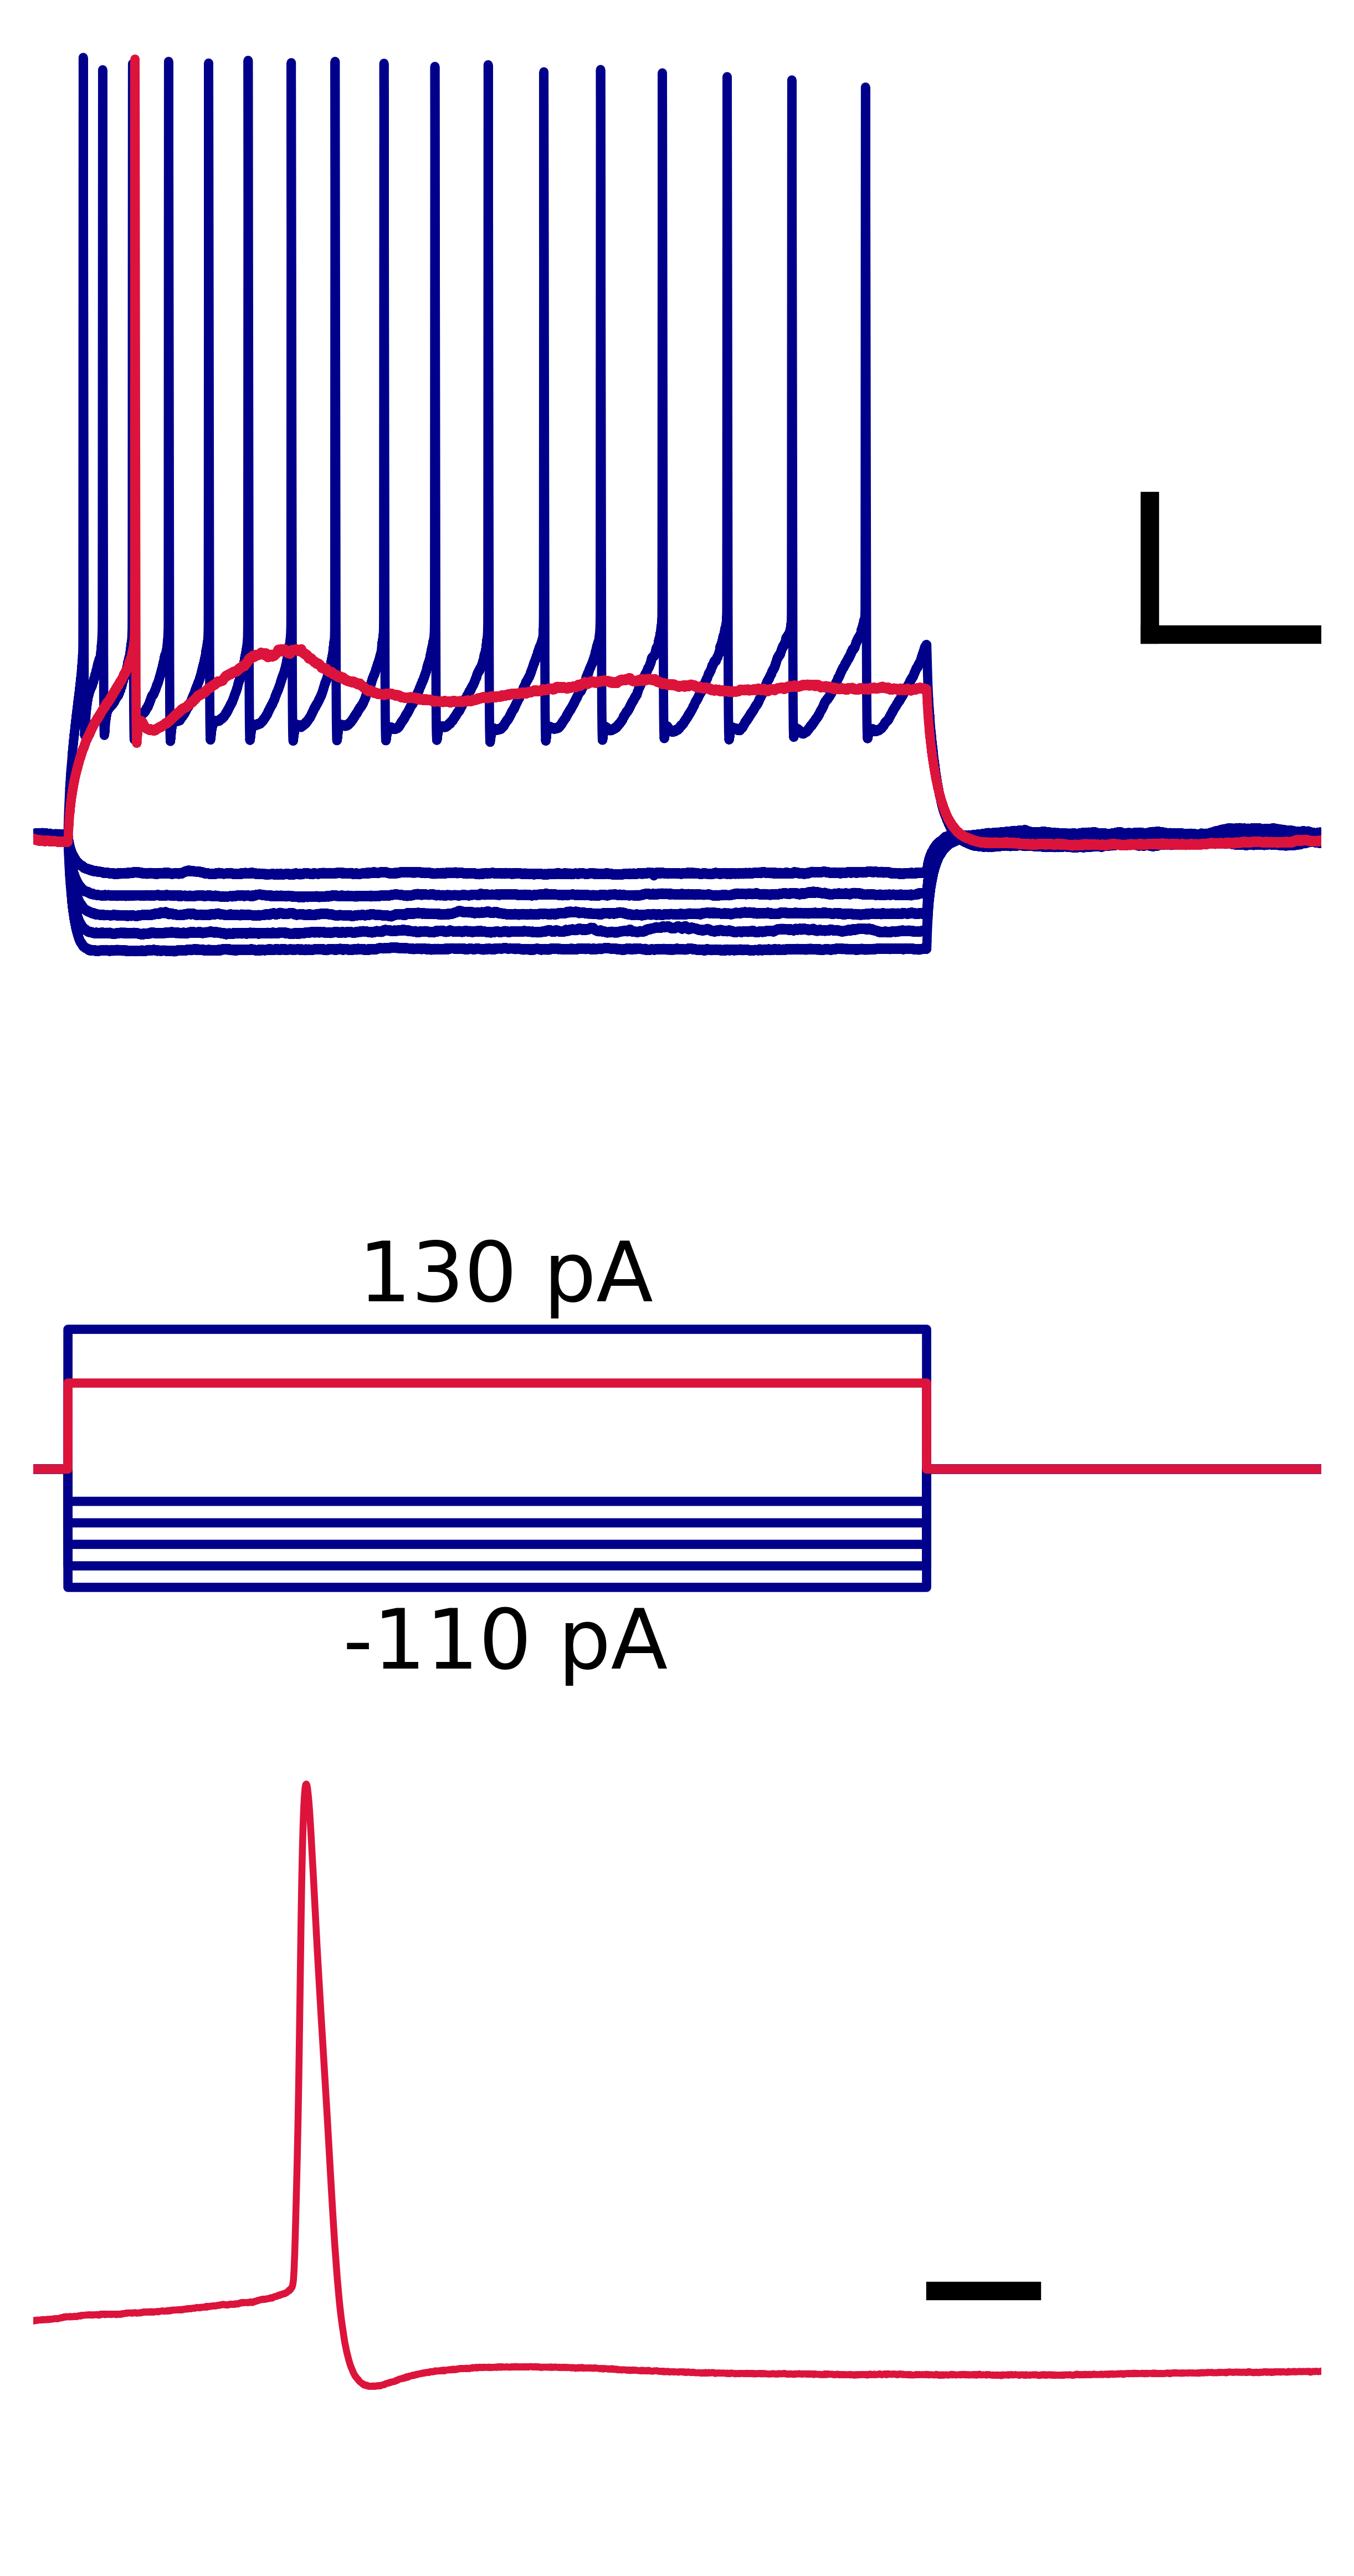

In [526]:
# CCK-FBXL7

sweep_list = [5,6,7,8,9,18,15]
sweep_rheo = 15
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

fig,axs = plt.subplots(3,1, figsize = (5,10), sharex = True, gridspec_kw={'height_ratios': [1, 0.25, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        color = 'crimson'
    else:
        color = 'darkblue'
    axs[0].plot(t,v,color,linewidth=2)
    axs[0].axis('off')
    axs[1].plot(t,i,color,linewidth=2)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))

plt.xlim([0.5, 2.0])
axs[0].set_ylim([-120, 50])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
x_min_ap = 0.61
x_max_ap = x_min_ap+0.04
axs[2].set_xlim([x_min_ap, x_max_ap])
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.7*(x_max_ap-x_min_ap)+x_min_ap, 0.7*(x_max_ap-x_min_ap)+x_min_ap + 0.003], [-40, -40], 'k', linewidth = 4)    # 3 ms

yl = axs[2].get_ylim()
axs[1].text(1.05, max_i + 0.35*(yl[1]-yl[0]), str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.05, min_i - 0.4*(yl[1]-yl[0]), str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

plt.savefig('/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/python/QN2226020140301_CCK-FBXL7.png')
plt.show()

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/235032707.py:33: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[0])
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/235032707.py:34: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[1])


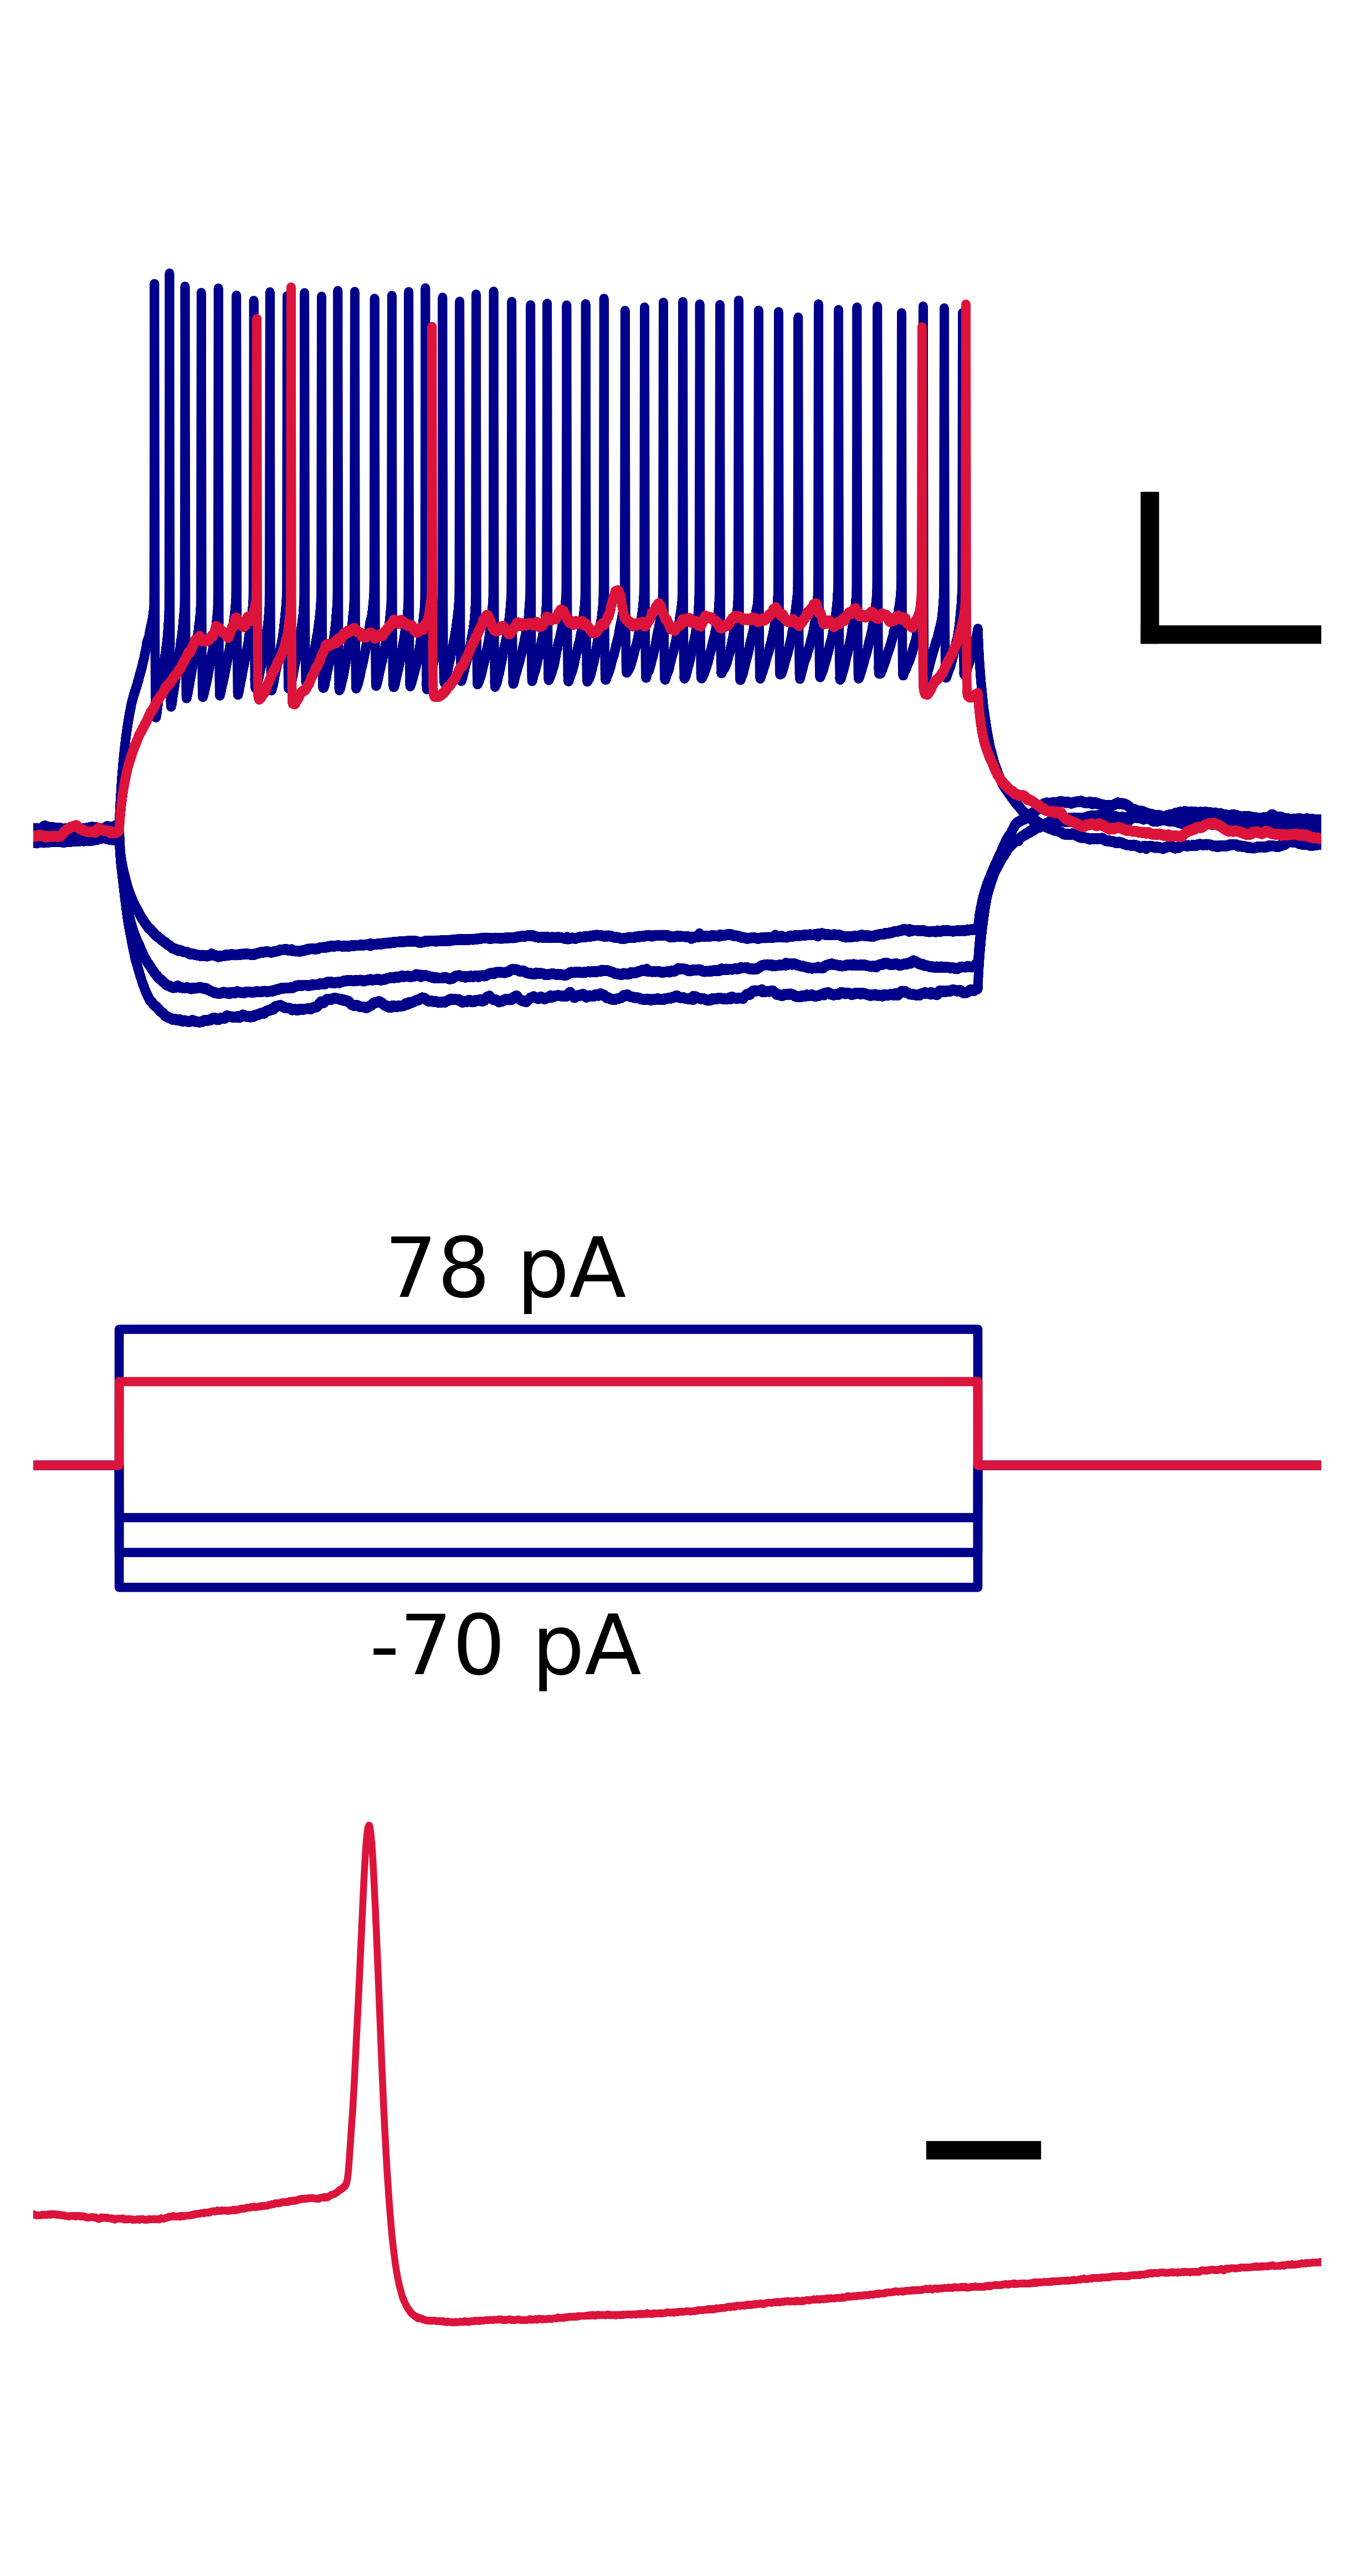

In [609]:
# TAC3-PLPP4

sweep_list = [4,22,23,45,43]
sweep_rheo = 43
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

fig,axs = plt.subplots(3,1, figsize = (5,10), sharex = True, gridspec_kw={'height_ratios': [1, 0.25, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        color = 'crimson'
    else:
        color = 'darkblue'
    axs[0].plot(t,v,color,linewidth=2)
    axs[0].axis('off')
    axs[1].plot(t,i,color,linewidth=2)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))

plt.xlim([0.5, 2.0])
axs[0].set_ylim([-120, 50])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
x_min_ap = 0.75
x_max_ap = x_min_ap+0.04
axs[2].set_xlim([x_min_ap, x_max_ap])
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.7*(x_max_ap-x_min_ap)+x_min_ap, 0.7*(x_max_ap-x_min_ap)+x_min_ap + 0.003], [-30, -30], 'k', linewidth = 4)    # 3 ms

yl = axs[2].get_ylim()
axs[1].text(1.05, max_i + 0.35*(yl[1]-yl[0]), str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.05, min_i - 0.4*(yl[1]-yl[0]), str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

plt.savefig('/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/python/QM2226003145103_LHX6-TAC3-PLPP4.png')

plt.show()

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/895925925.py:33: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[0])
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_99305/895925925.py:34: MatplotlibDeprecationWarning: The remove function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  g.remove(axs[1])


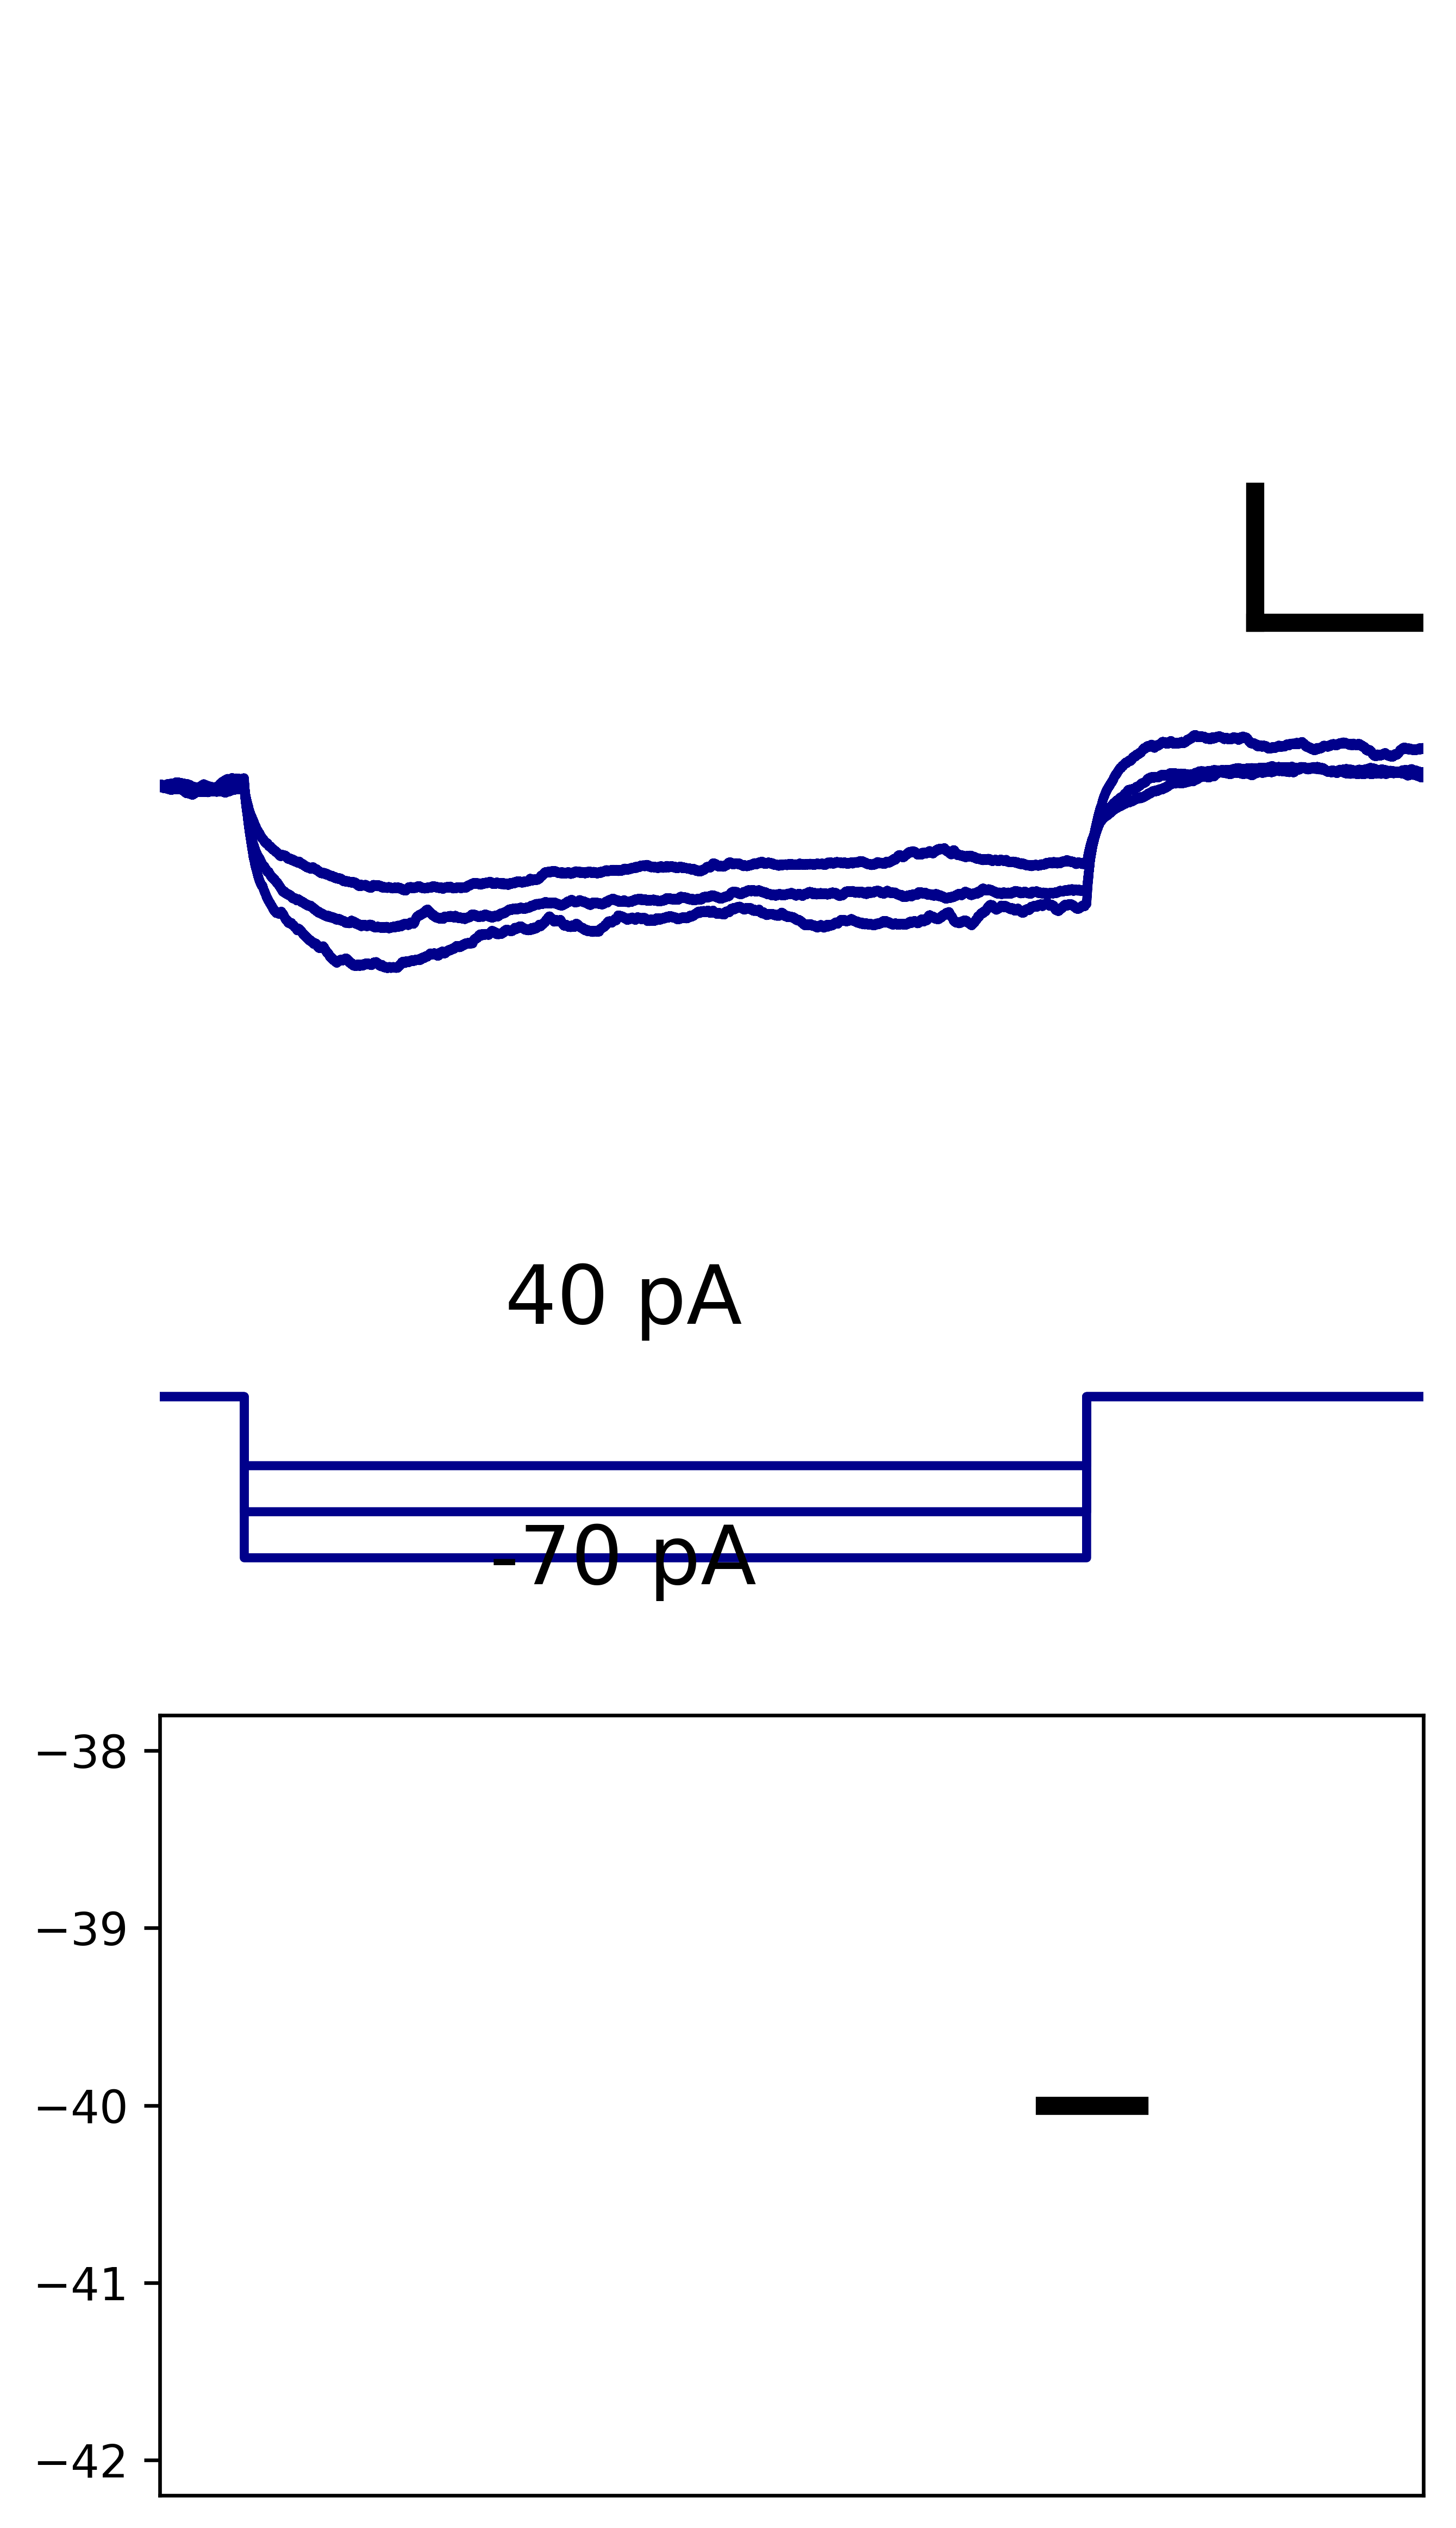

In [561]:
# TAC3-PLPP4    Second option

sweep_list = [16,32,33]
sweep_rheo = 43
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

fig,axs = plt.subplots(3,1, figsize = (5,10), sharex = True, gridspec_kw={'height_ratios': [1, 0.25, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        color = 'crimson'
    else:
        color = 'darkblue'
    axs[0].plot(t,v,color,linewidth=2)
    axs[0].axis('off')
    axs[1].plot(t,i,color,linewidth=2)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))

plt.xlim([0.5, 2.0])
axs[0].set_ylim([-120, 50])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
x_min_ap = 0.61
x_max_ap = x_min_ap+0.04
axs[2].set_xlim([x_min_ap, x_max_ap])
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.7*(x_max_ap-x_min_ap)+x_min_ap, 0.7*(x_max_ap-x_min_ap)+x_min_ap + 0.003], [-40, -40], 'k', linewidth = 4)    # 3 ms

yl = axs[2].get_ylim()
axs[1].text(1.05, max_i + 0.35*(yl[1]-yl[0]), str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.05, min_i - 0.4*(yl[1]-yl[0]), str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

plt.savefig('/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/python/QN2226010145102_LHX6-TAC3-PLPP4.png')

plt.show()

In [ ]:
# TAC3-PLPP4

sweep_list = [16,32,33]
sweep_rheo = 43
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

fig,axs = plt.subplots(3,1, figsize = (5,10), sharex = True, gridspec_kw={'height_ratios': [1, 0.25, 0.7]})
all_i = np.array([])
for sw in sweep_list:
    sweep = dataset.sweep(sw)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    if (sw == sweep_rheo):
        color = 'crimson'
    else:
        color = 'darkblue'
    axs[0].plot(t,v,color,linewidth=2)
    axs[0].axis('off')
    axs[1].plot(t,i,color,linewidth=2)
    axs[1].axis('off')
    if (sw == sweep_rheo):
        axs[2].plot(t,v, 'crimson')
        axs[2].axis('off')
    all_i = np.concatenate((all_i, np.squeeze(sweep.i)))
min_i = round(np.min(all_i))
max_i = round(np.max(all_i))

plt.xlim([0.5, 2.0])
axs[0].set_ylim([-120, 50])
g = axs[2].get_shared_x_axes()
g.remove(axs[0])
g.remove(axs[1])
x_min_ap = 0.61
x_max_ap = x_min_ap+0.04
axs[2].set_xlim([x_min_ap, x_max_ap])
axs[0].plot([1.8, 2.0], [-40, -40], 'k', linewidth = 4)     # 200 ms
axs[0].plot([1.8, 1.8], [-20, -40], 'k', linewidth = 4)      # 20 mV
axs[2].plot([0.7*(x_max_ap-x_min_ap)+x_min_ap, 0.7*(x_max_ap-x_min_ap)+x_min_ap + 0.003], [-40, -40], 'k', linewidth = 4)    # 3 ms

yl = axs[2].get_ylim()
axs[1].text(1.05, max_i + 0.35*(yl[1]-yl[0]), str(max_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')
axs[1].text(1.05, min_i - 0.4*(yl[1]-yl[0]), str(min_i) + ' pA', size = 18, color = 'k', horizontalalignment = 'center', verticalalignment = 'center')

plt.savefig('/Users/xiaoping.liu/celltypes/NHP_BG_anal/raw_traces/python/QN2226014143A01_LHX6-TAC3-PLPP4.png')

plt.show()


In [165]:
long_squares = dataset.filtered_sweep_table(stimuli=dataset.ontology.long_square_names) # more on this next!
#sweep_set = dataset.sweep_set(long_squares.sweep_number
long_squares.sweep_number
#long_squares.columns
long_squares

,sweep_number,stimulus_units,bridge_balance_mohm,leak_pa,capacitance_compensation,sampling_rate,stimulus_scale_factor,stimulus_code,stimulus_code_ext,clamp_mode,stimulus_name
4,4,Amps,14.957265,-4.117080,2.000269,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[0],CurrentClamp,Long Square
5,5,Amps,14.957265,-4.117080,2.000269,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[1],CurrentClamp,Long Square
6,6,Amps,14.957265,-4.117080,2.000269,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[2],CurrentClamp,Long Square
7,7,Amps,14.957265,-4.117080,2.000269,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[3],CurrentClamp,Long Square
8,8,Amps,14.957265,-7.526536,2.000269,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[4],CurrentClamp,Long Square
9,9,Amps,14.957265,-7.526536,2.000269,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[5],CurrentClamp,Long Square
10,10,Amps,14.957265,-7.526536,2.000269,50000.0,10.0,X1PS_SubThresh,X1PS_SubThresh[6],CurrentClamp,Long Square
14,14,Amps,14.957265,-7.526536,2.000269,50000.0,10.0,X3LP_Rheo,X3LP_Rheo[0],CurrentClamp,Long Square
15,15,Amps,14.957265,-3.988421,2.000269,50000.0,10.0,X3LP_Rheo,X3LP_Rheo[1],CurrentClamp,Long Square
16,16,Amps,14.957265,-3.988421,2.000269,50000.0,10.0,X3LP_Rheo,X3LP_Rheo[2],CurrentClamp,Long Square


NameError: name 'fm' is not defined

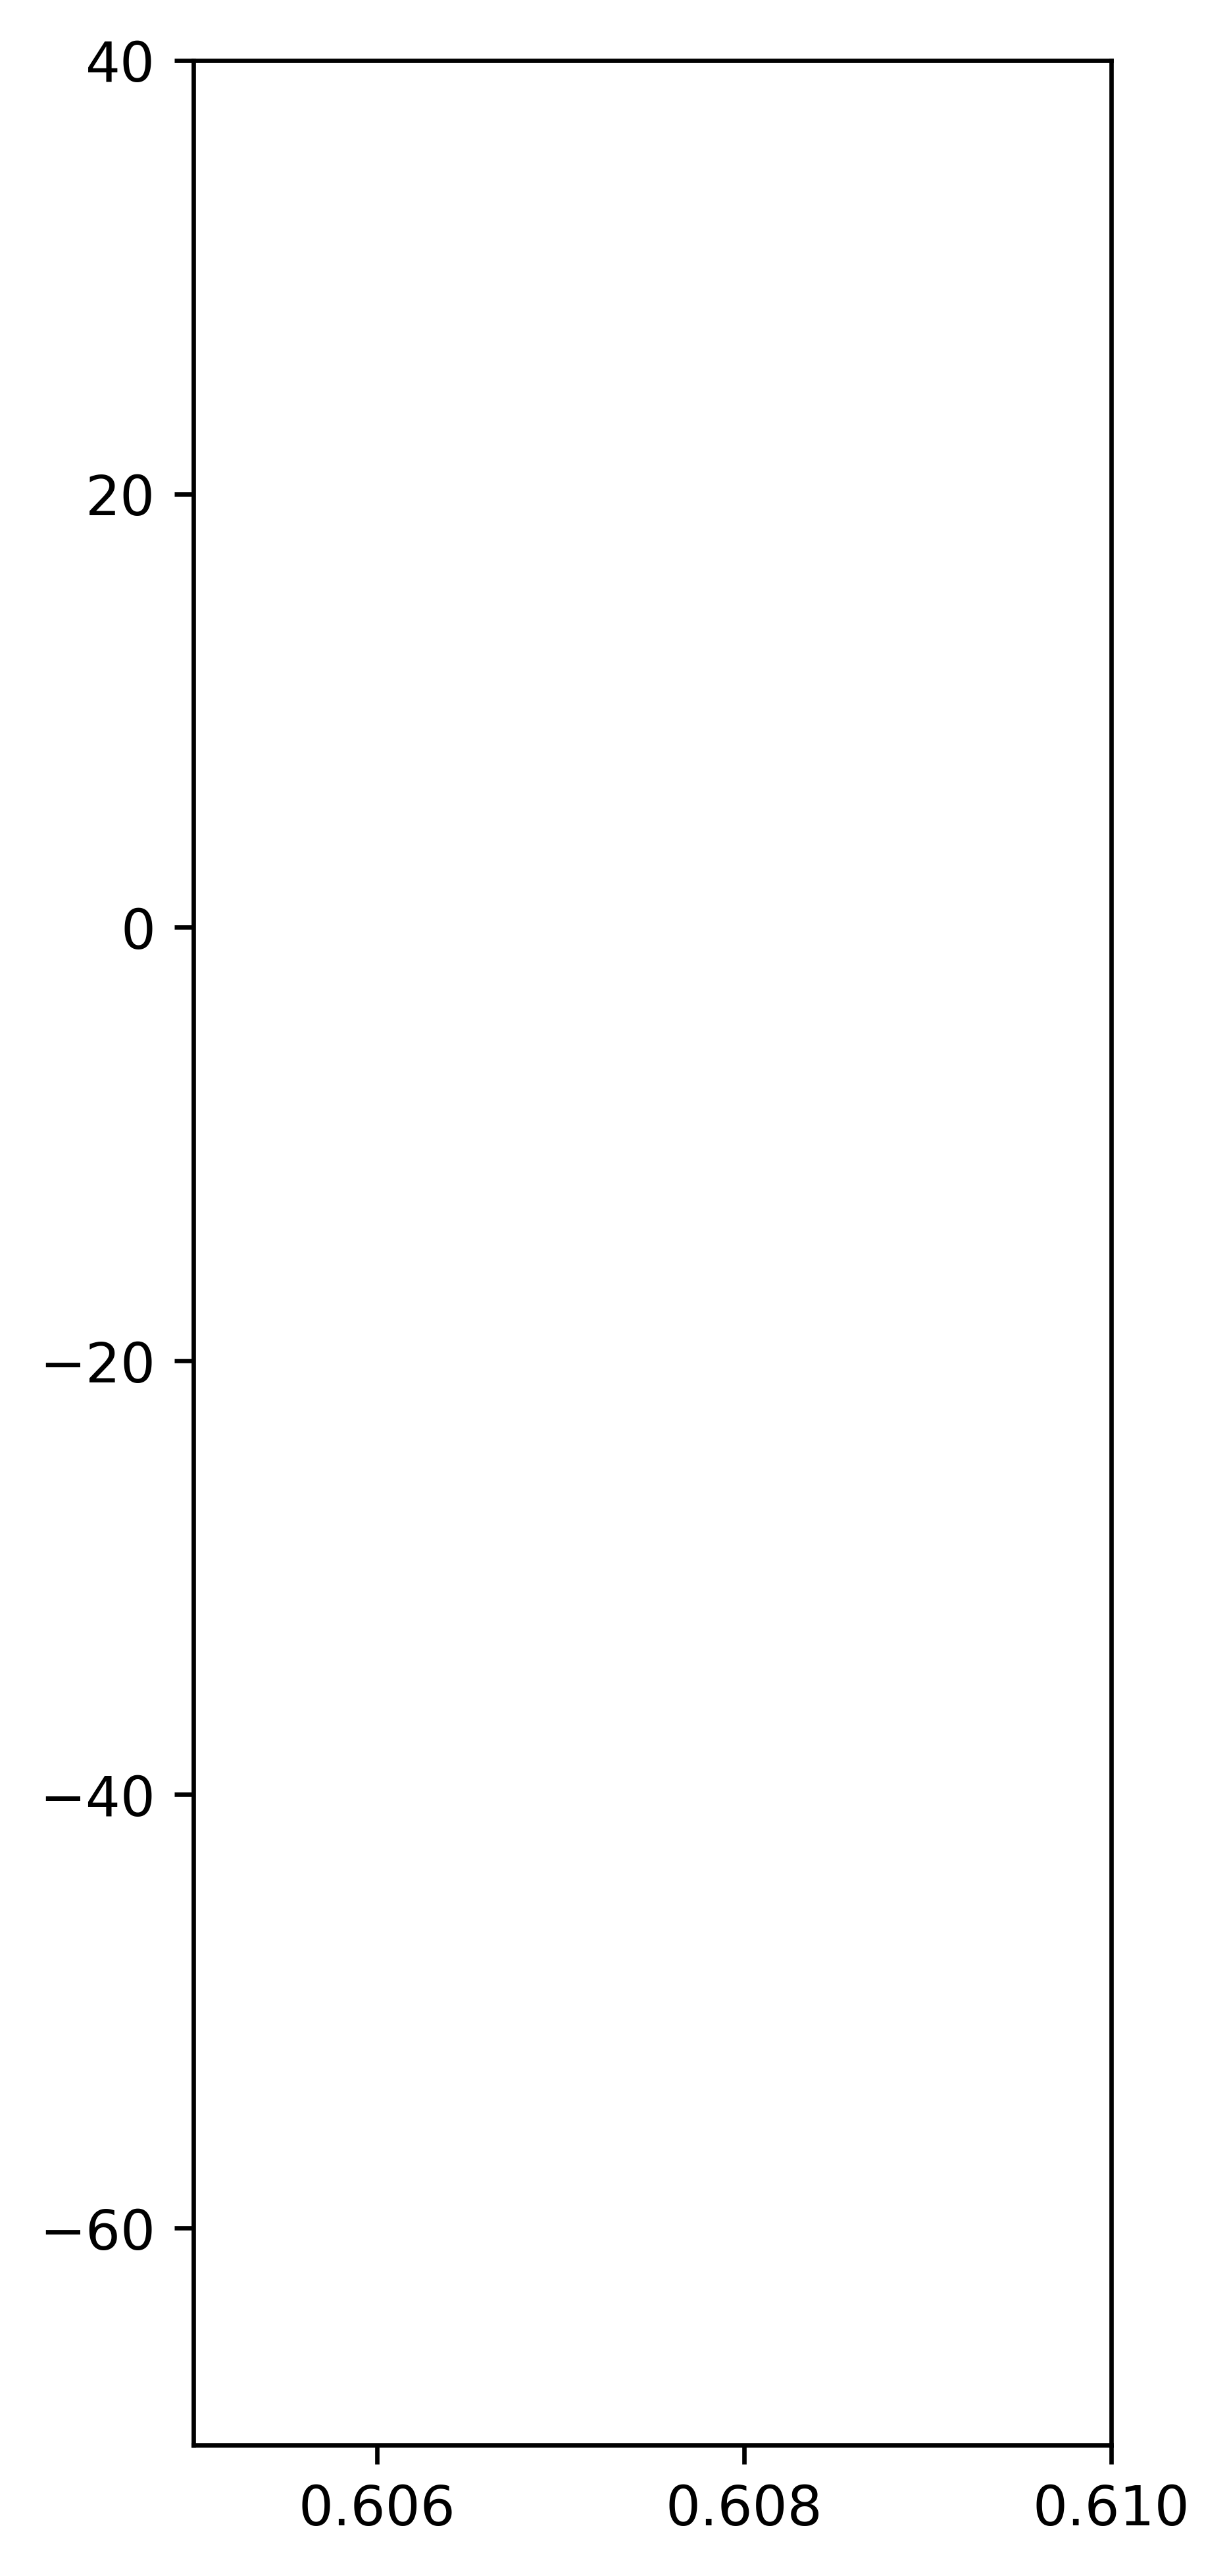

In [97]:
# For AP waveform, with scale ticker

sweep_list = [10]

fig,ax = plt.subplots(figsize = (3,8))

for i in sweep_list:
    sweep = dataset.sweep(i)
    t = sweep.t
    v = sweep.v
    i = sweep.i
    plt.plot(t,v)

plt.xlim([0.605, 0.61])
plt.ylim([-70, 40])

fontprops = fm.FontProperties(size=18)

scalebar = AnchoredSizeBar(plt.gca().transData,
                           0.001, '1 ms', 'lower center', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

plt.gca().add_artist(scalebar)
plt.axis('off')
plt.gca().get_yaxis().set_visible(True)
plt.show()

In [164]:
chirps = dataset.filtered_sweep_table(stimuli=dataset.ontology.chirp_names) # more on this next!
#sweep_set = dataset.sweep_set(long_squares.sweep_number
chirps.sweep_number
#long_squares.columns
chirps

,sweep_number,stimulus_units,bridge_balance_mohm,leak_pa,capacitance_compensation,sampling_rate,stimulus_scale_factor,stimulus_code,stimulus_code_ext,clamp_mode,stimulus_name


In [163]:
ramps = dataset.filtered_sweep_table(stimuli=dataset.ontology.ramp_names) # more on this next!
#sweep_set = dataset.sweep_set(long_squares.sweep_number
ramps.sweep_number
#long_squares.columns
ramps

,sweep_number,stimulus_units,bridge_balance_mohm,leak_pa,capacitance_compensation,sampling_rate,stimulus_scale_factor,stimulus_code,stimulus_code_ext,clamp_mode,stimulus_name
42,42,Amps,14.957265,-10.678675,2.000269,50000.0,10.0,X7Ramp,X7Ramp[0],CurrentClamp,Ramp
43,43,Amps,14.957265,-10.678675,2.000269,50000.0,10.0,X7Ramp,X7Ramp[1],CurrentClamp,Ramp
44,44,Amps,14.957265,-10.678675,2.000269,50000.0,10.0,X7Ramp,X7Ramp[2],CurrentClamp,Ramp
